In [1]:
%load_ext autoreload

In [2]:
%autoreload all

In [191]:
import os

import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *
from utils.model_evaluation.client_contribution import *

sns.set(font_scale=1.25)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

%matplotlib inline

In [4]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"
OUTPUT_TABLES = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/tables.tex"

In [5]:
if os.path.exists(OUTPUT_TABLES) and os.path.isfile(OUTPUT_TABLES):
    os.remove(OUTPUT_TABLES)

In [6]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [7]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [8]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

In [9]:
def log_table(df: pd.DataFrame, name: str) -> pd.DataFrame:
    with open(OUTPUT_TABLES, "a") as f:
        f.write(f"======= {name} =======\n")
        f.write(df.to_latex(float_format="%.3f"))
        f.write("\n\n")
    return df

# Runs

Each run/imbalance combination is in a different db file:

In [10]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240608_201758"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240609_091903"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [11]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

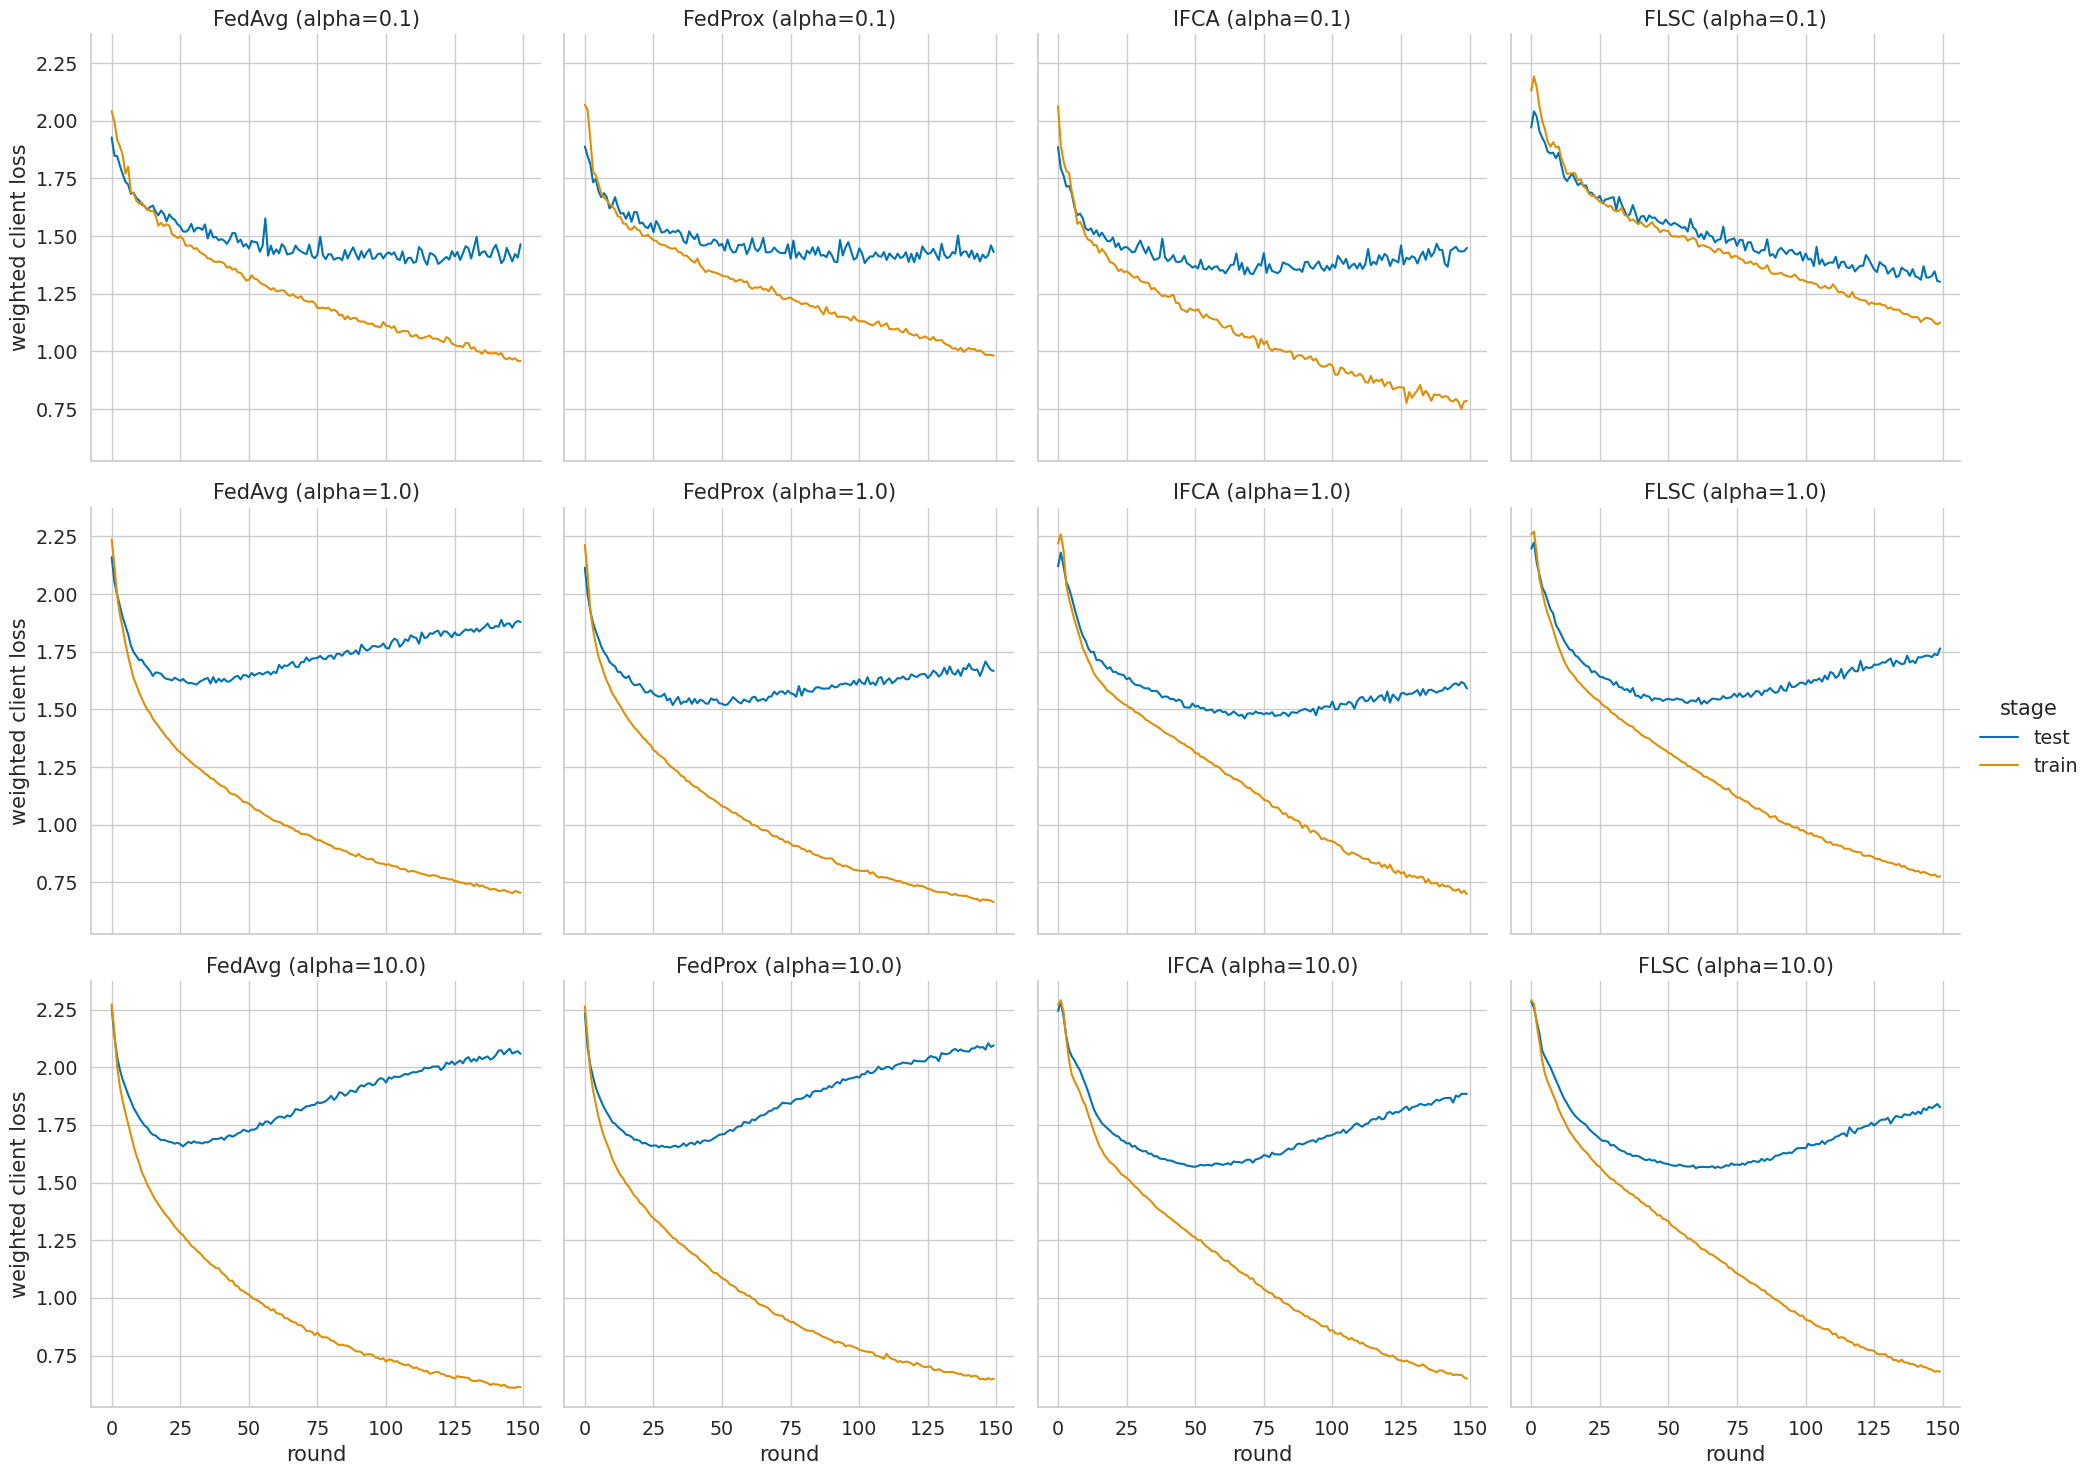

In [12]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


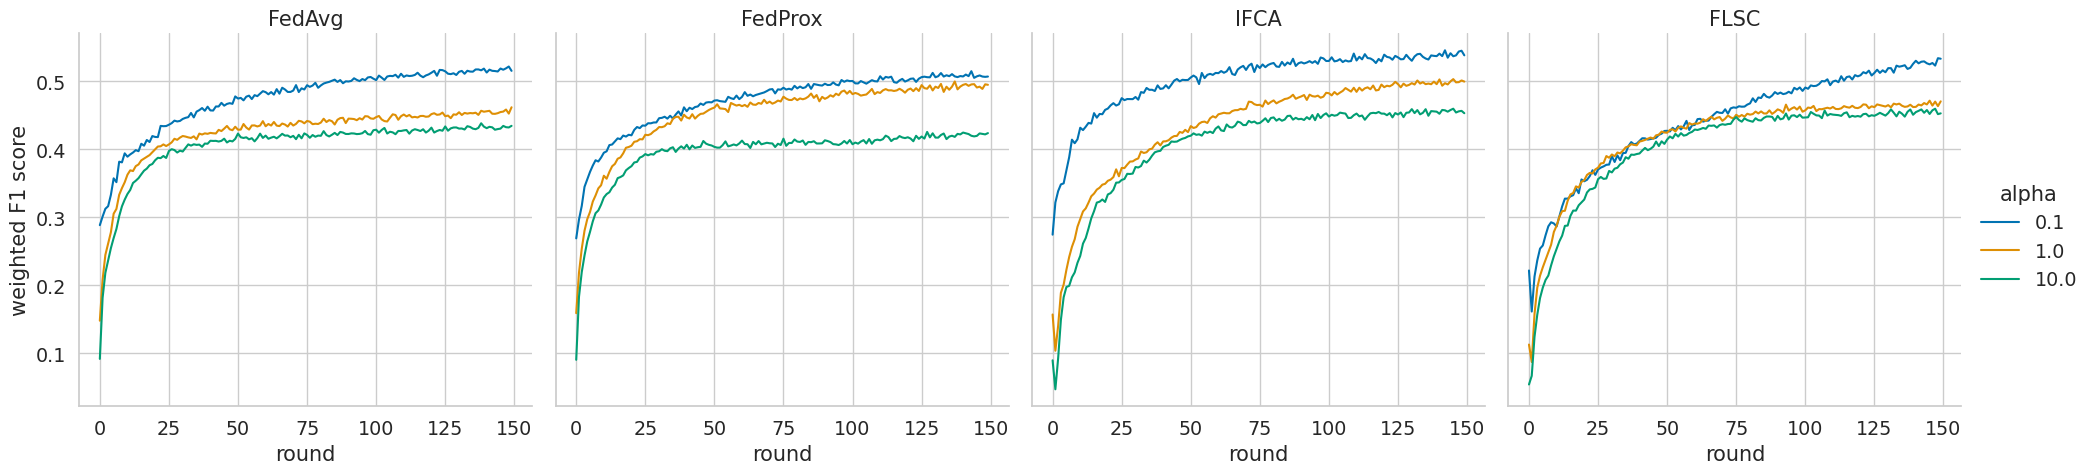

In [13]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

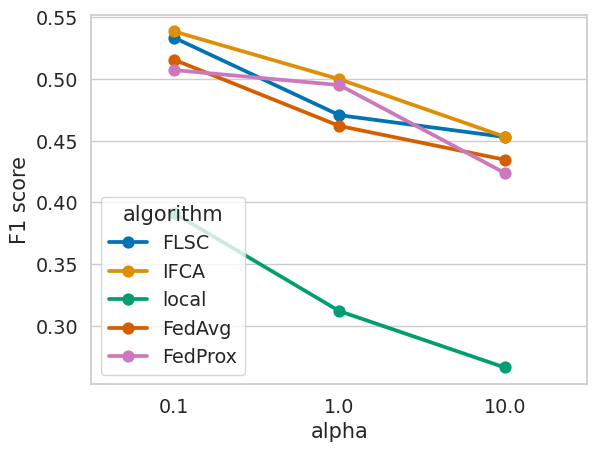

In [14]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [15]:
conn.close()

### MNIST

In [16]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

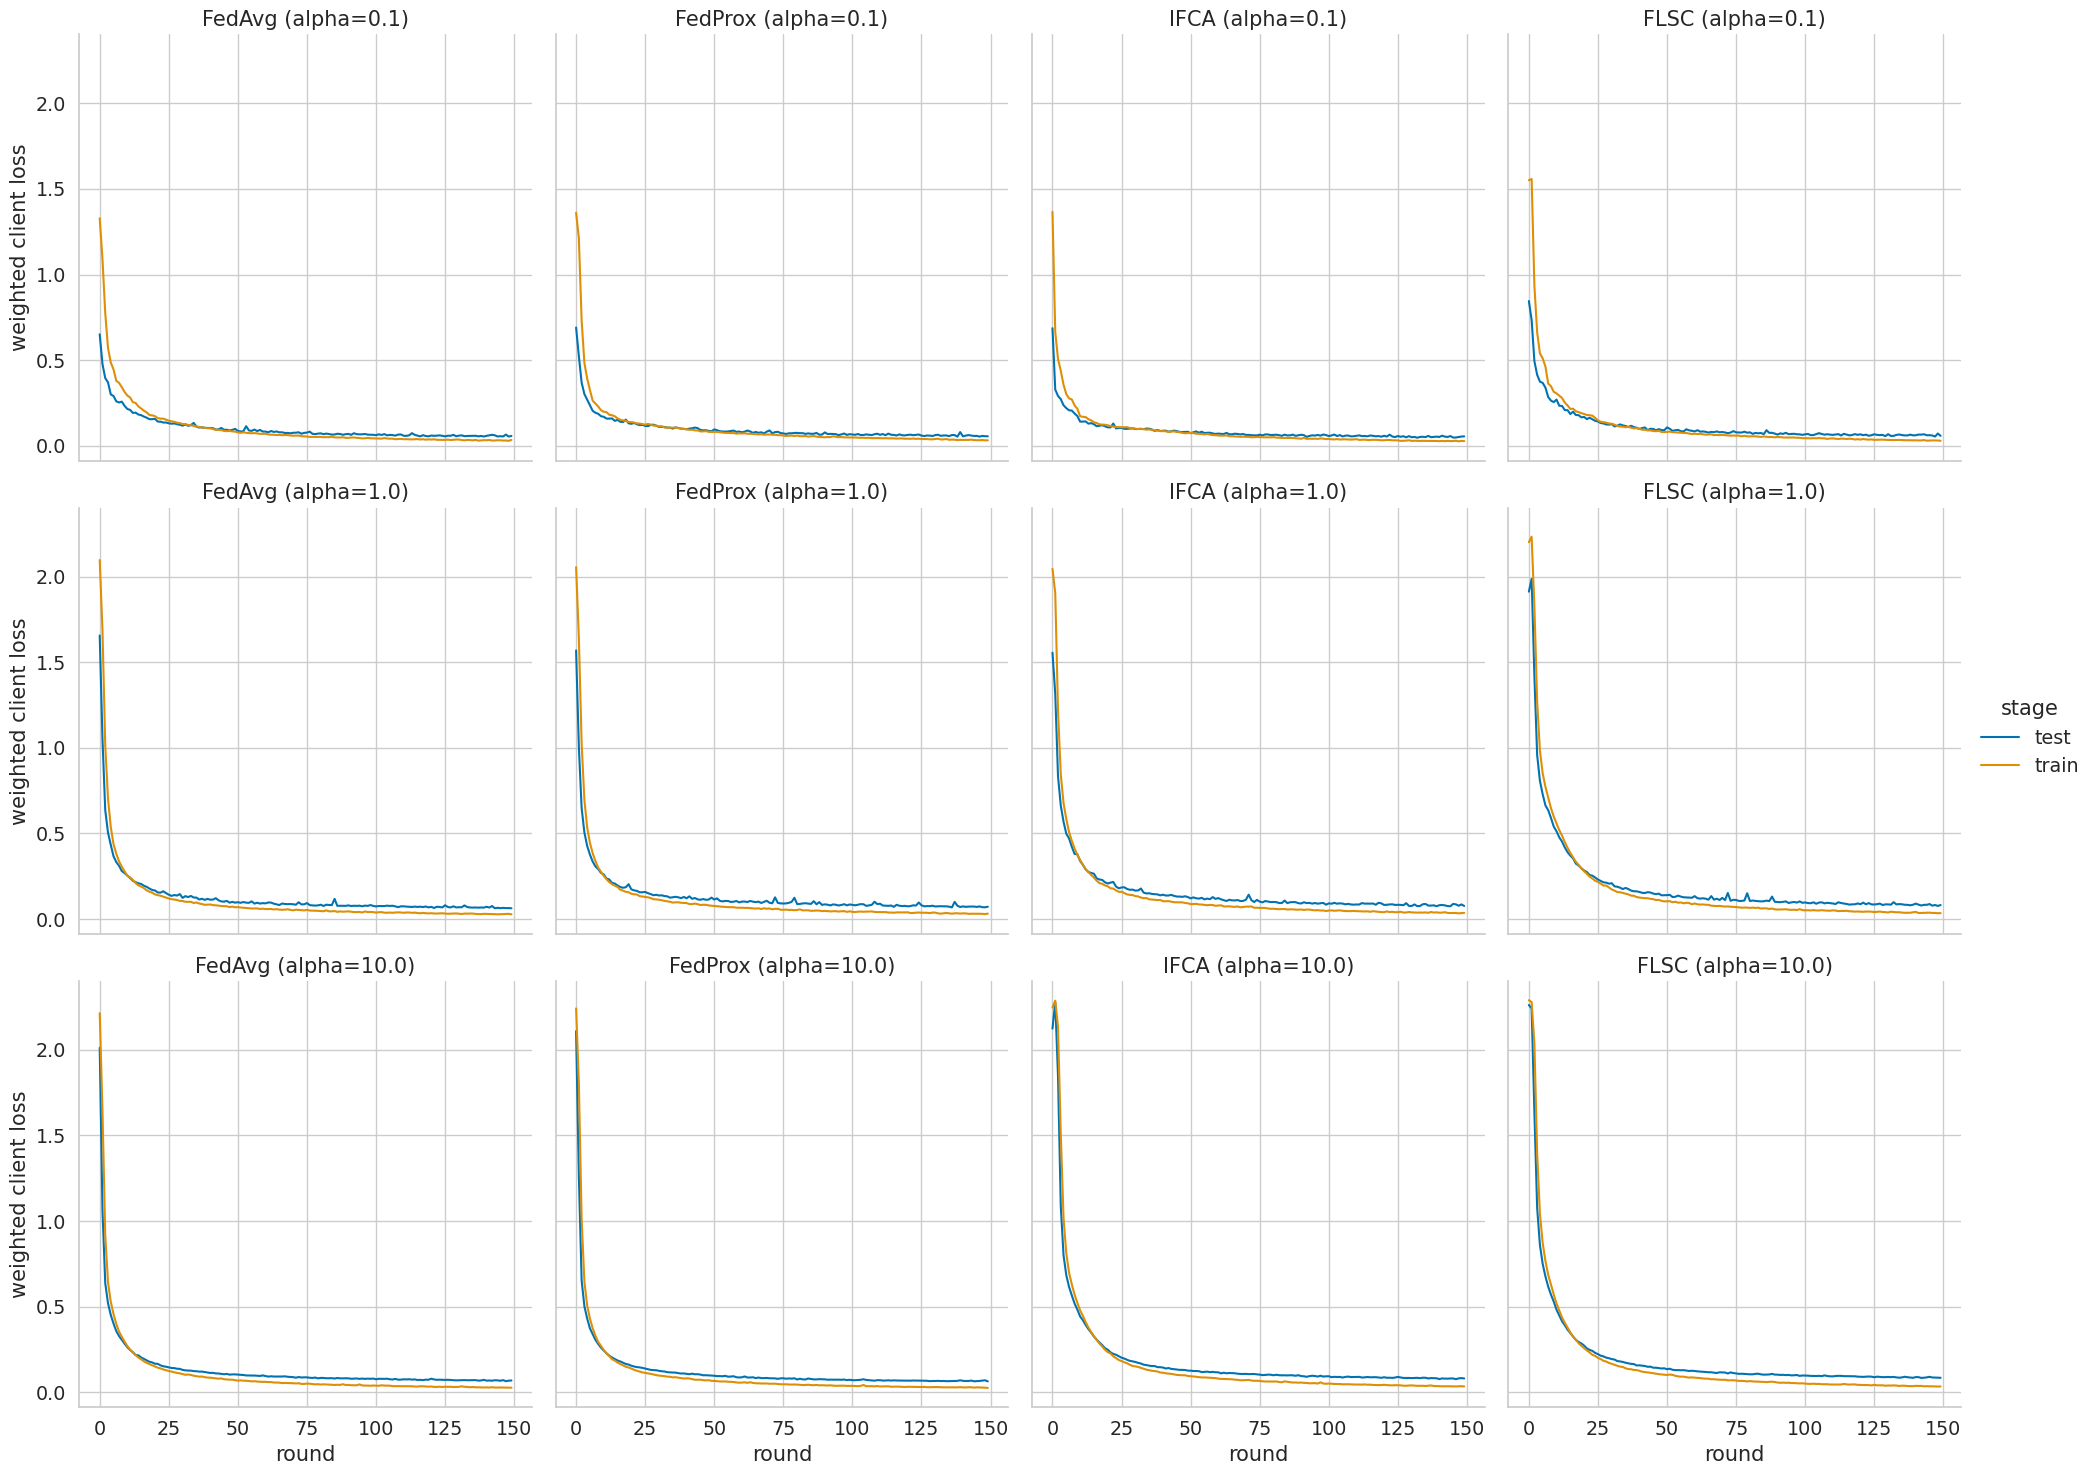

In [17]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


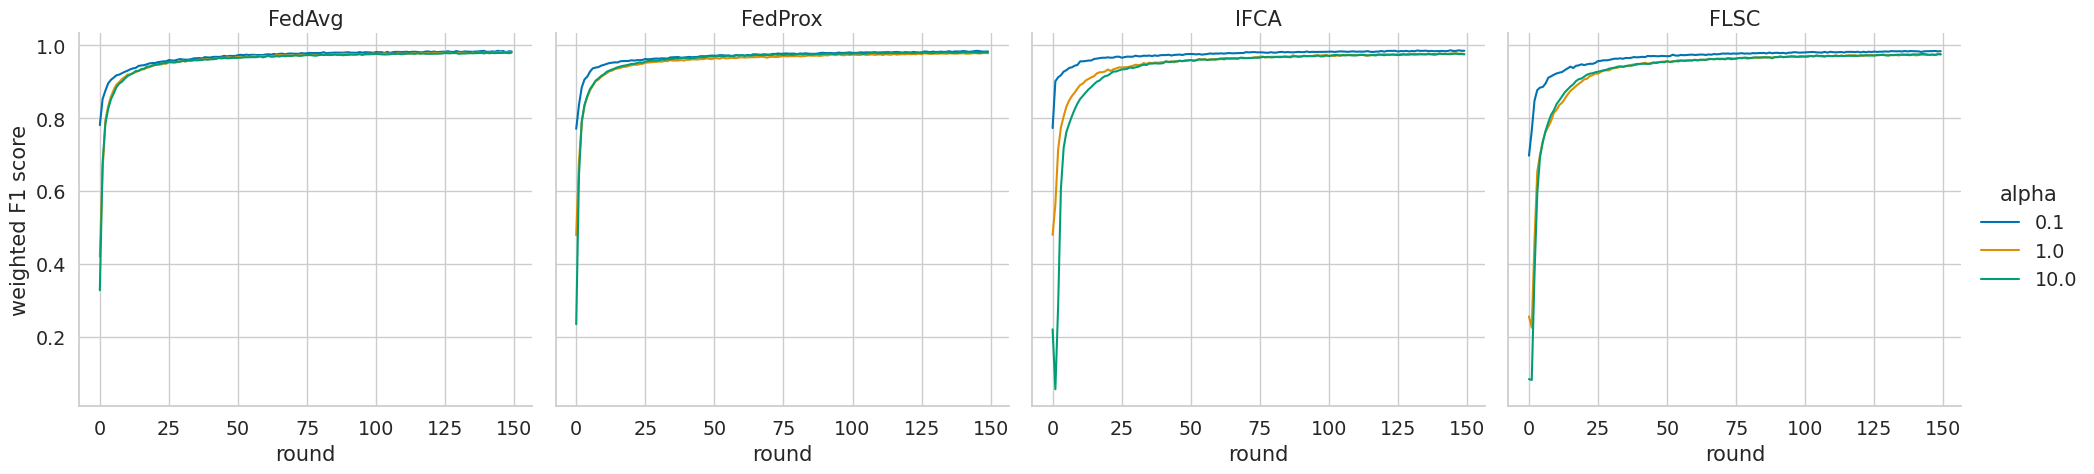

In [18]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

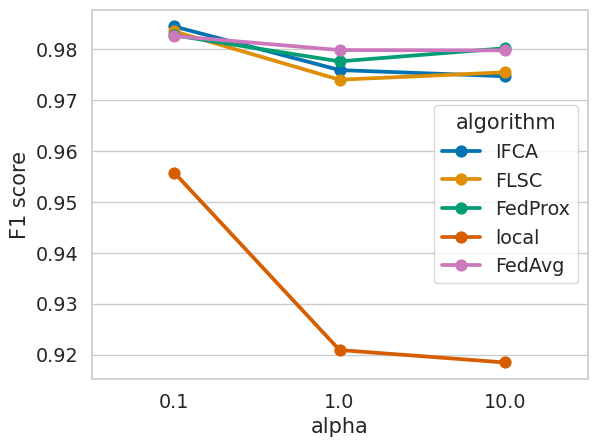

In [19]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [20]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [21]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

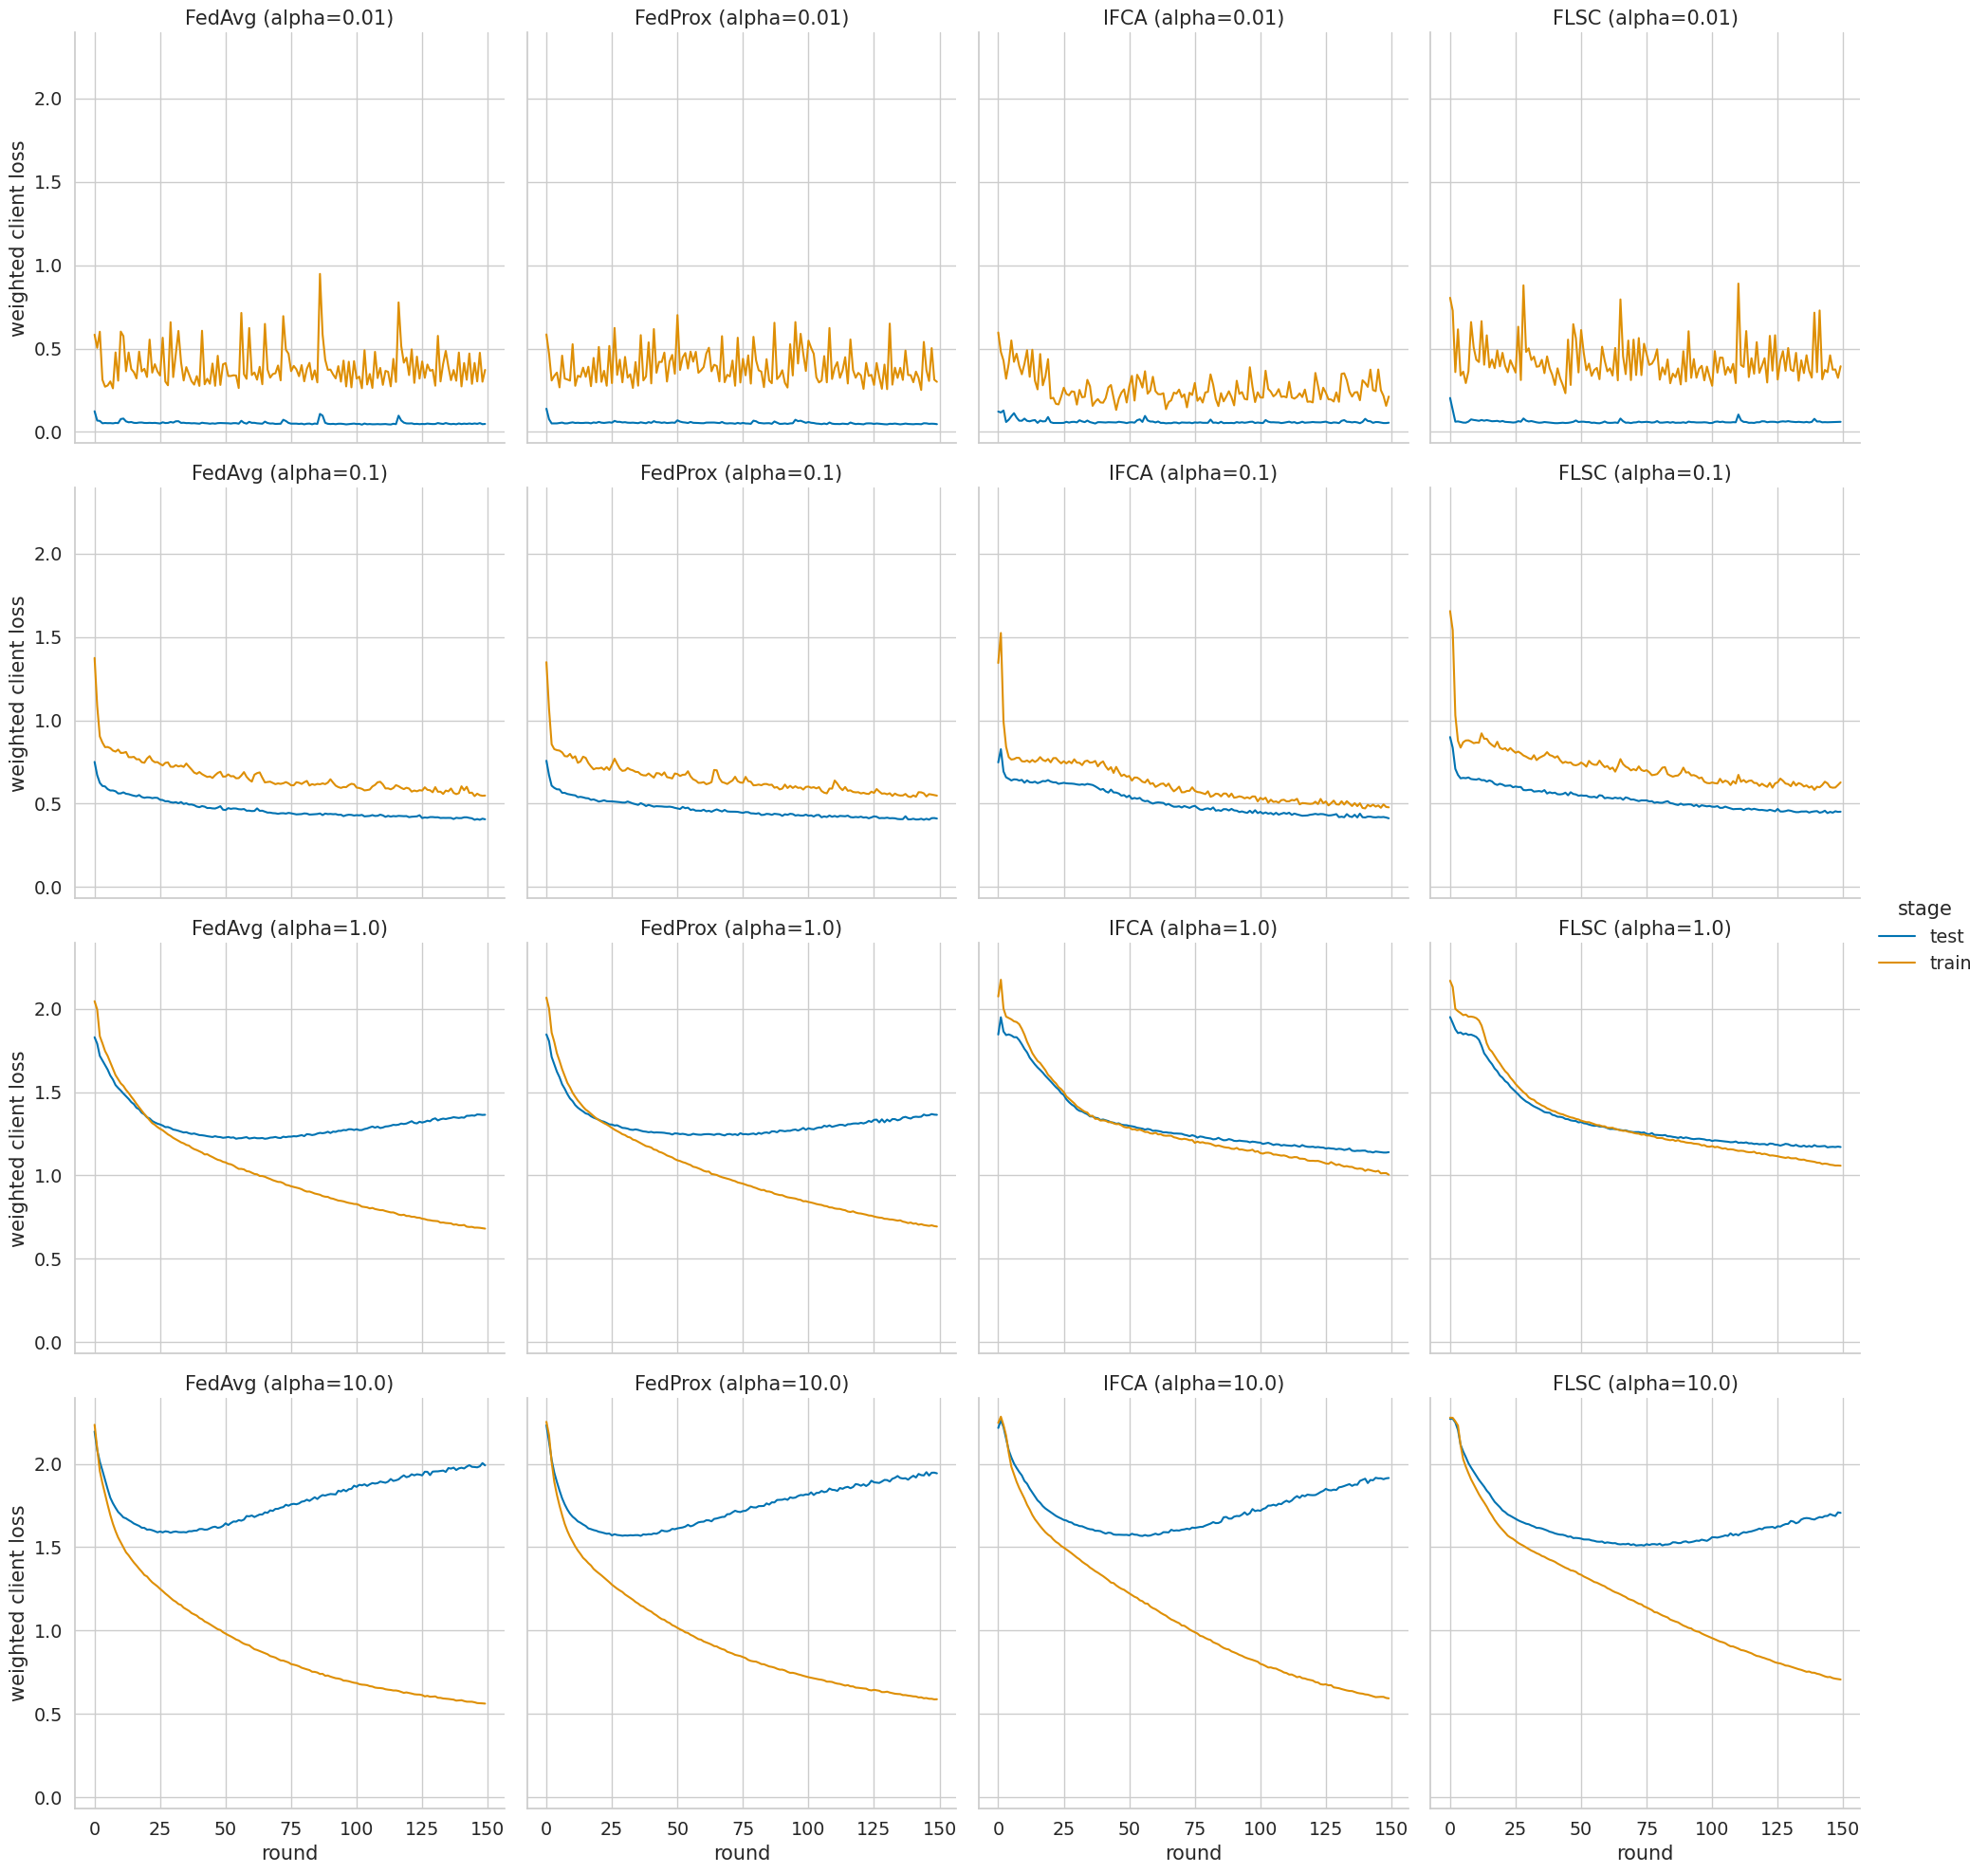

In [22]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


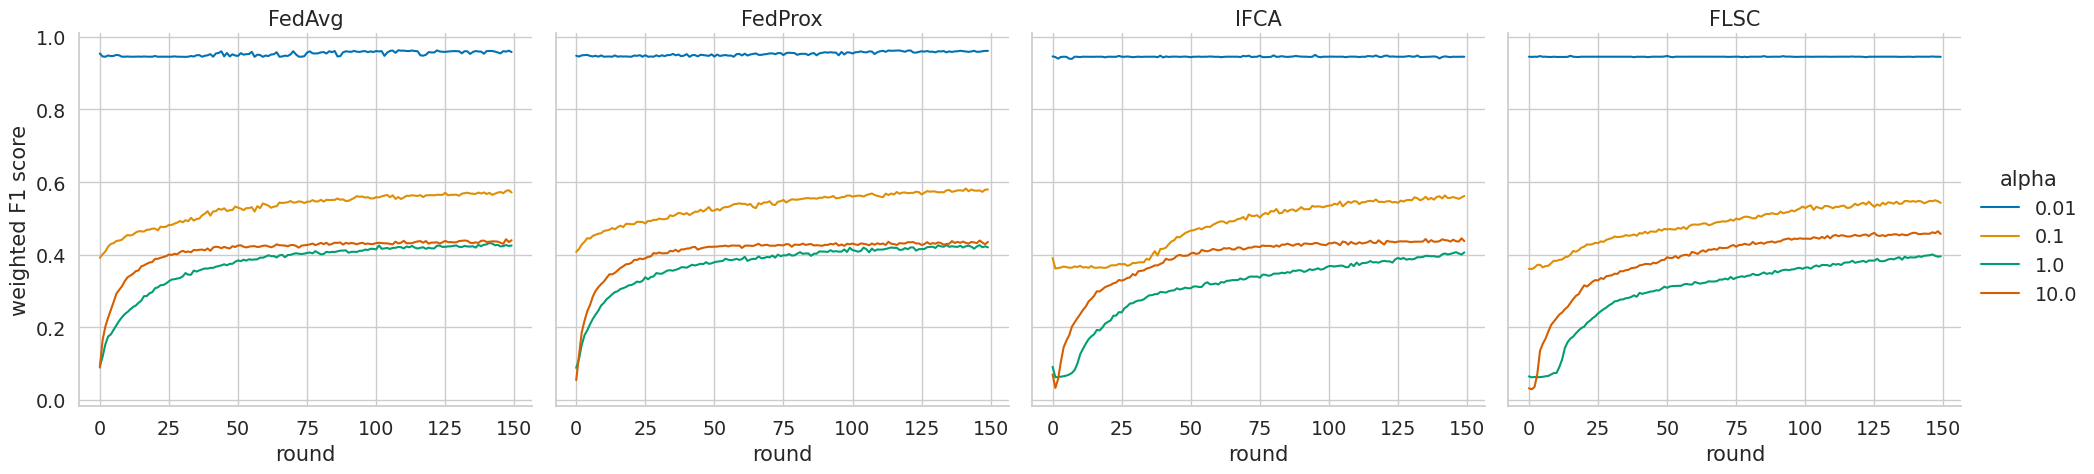

In [23]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

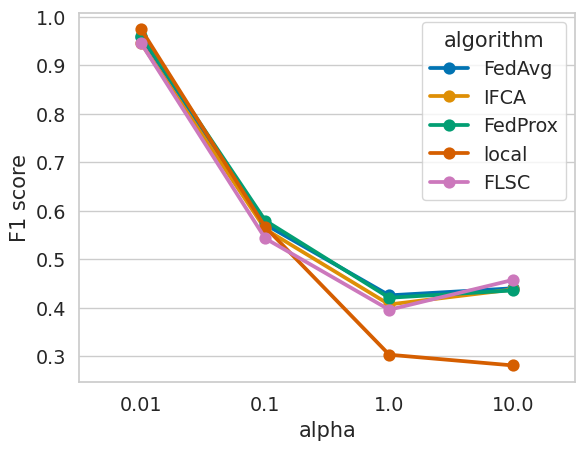

In [24]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [25]:
conn.close()

### MNIST

In [26]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

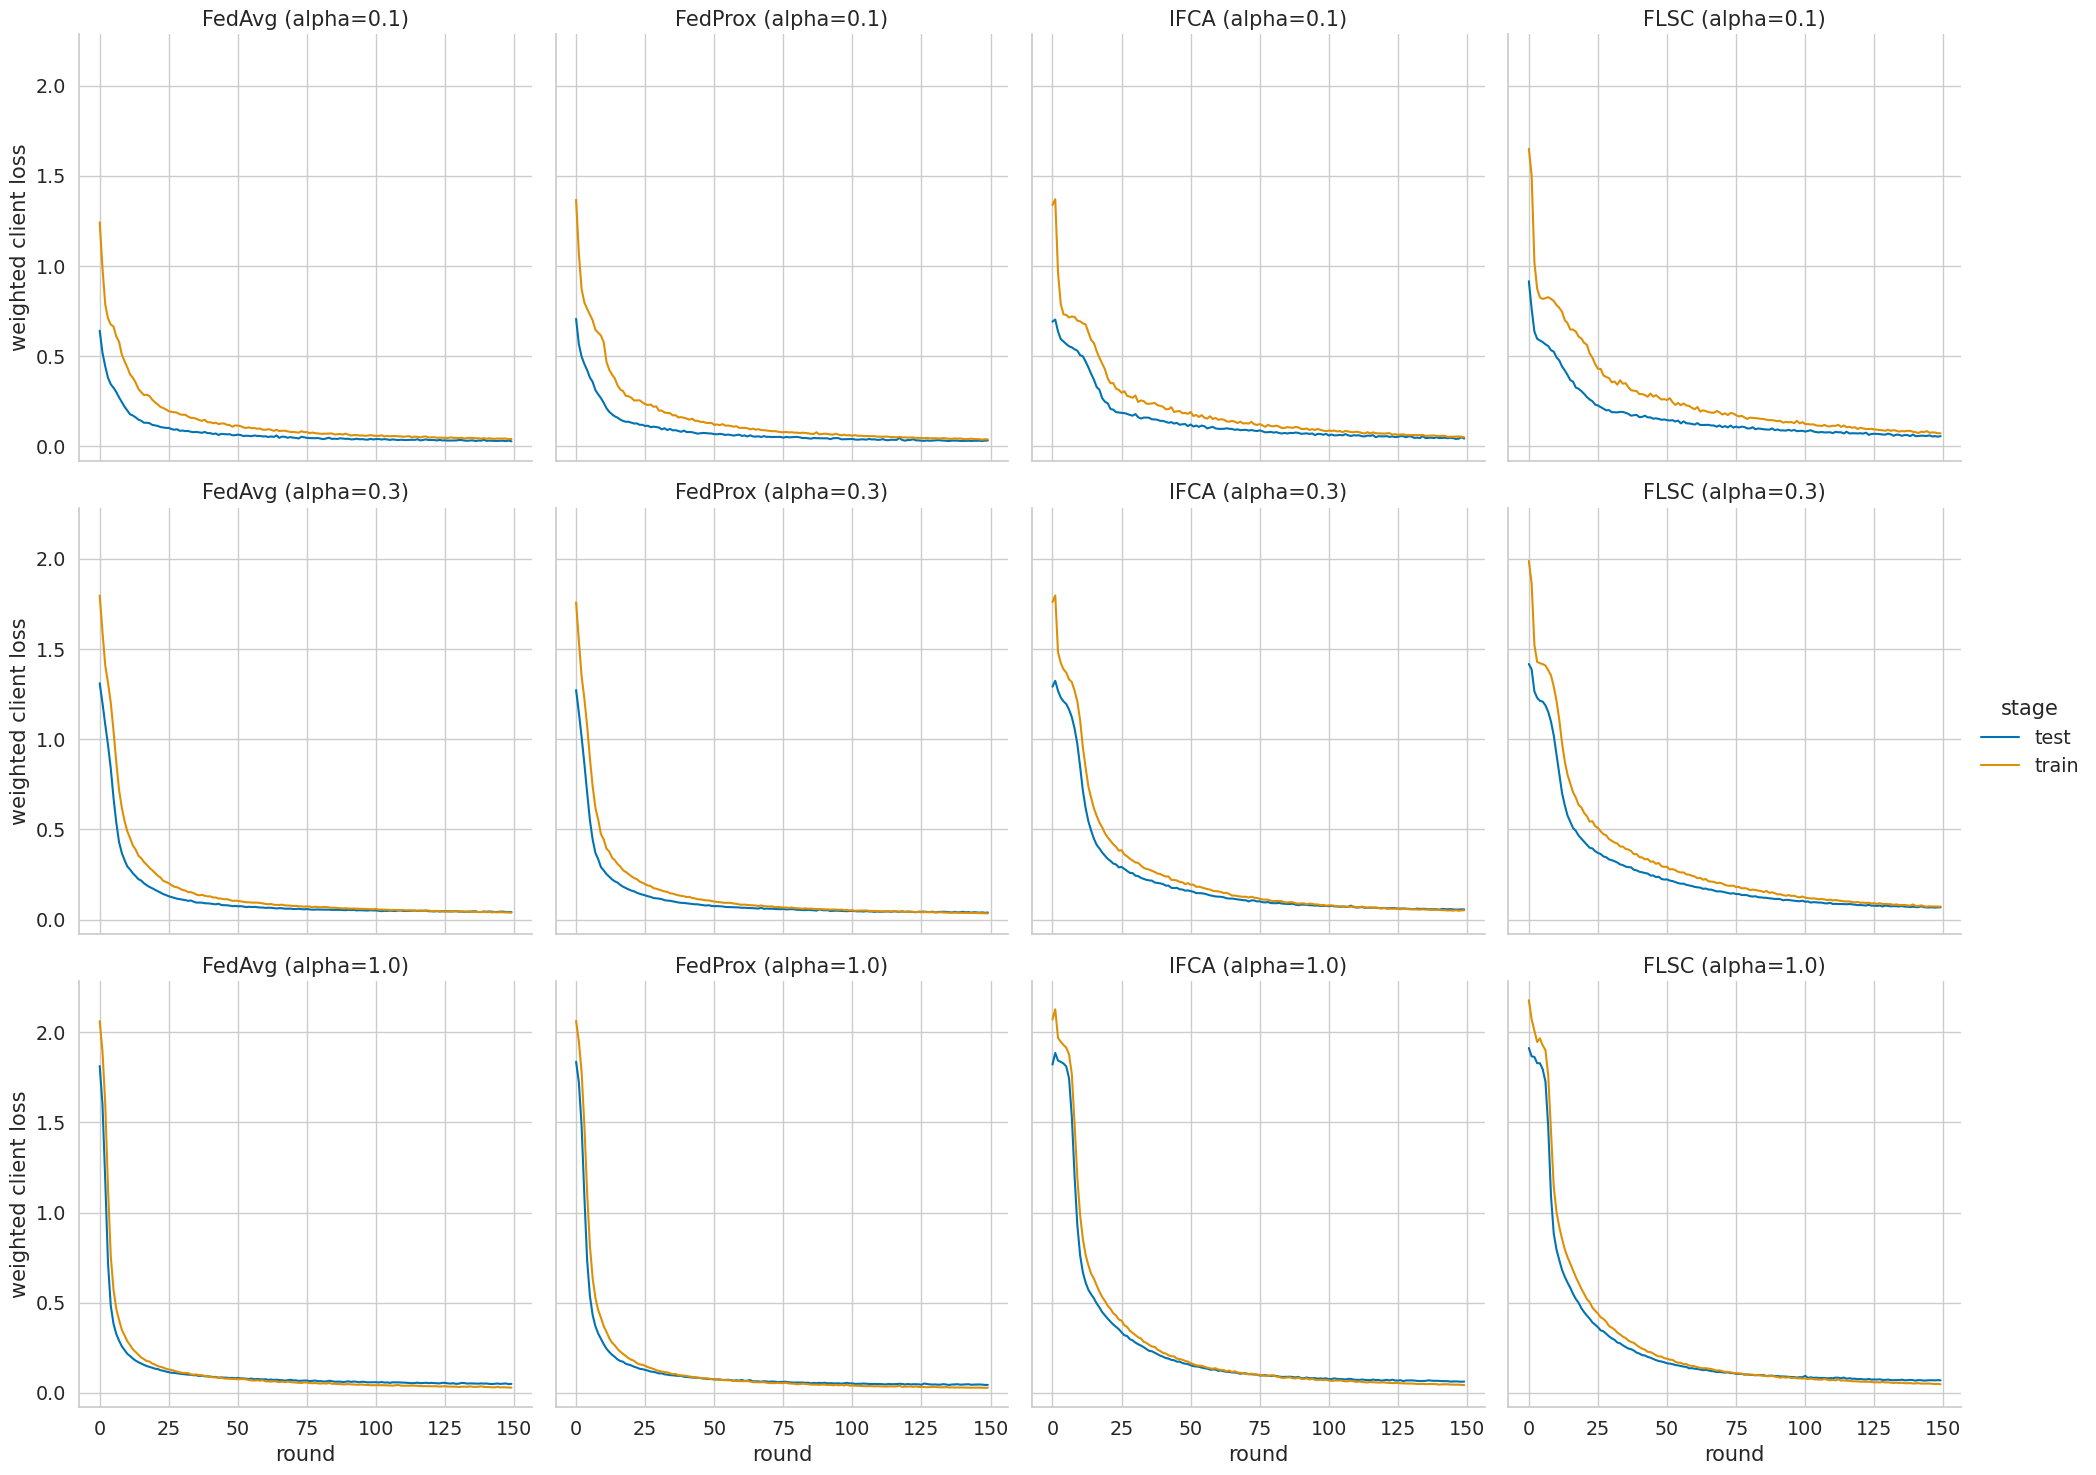

In [27]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


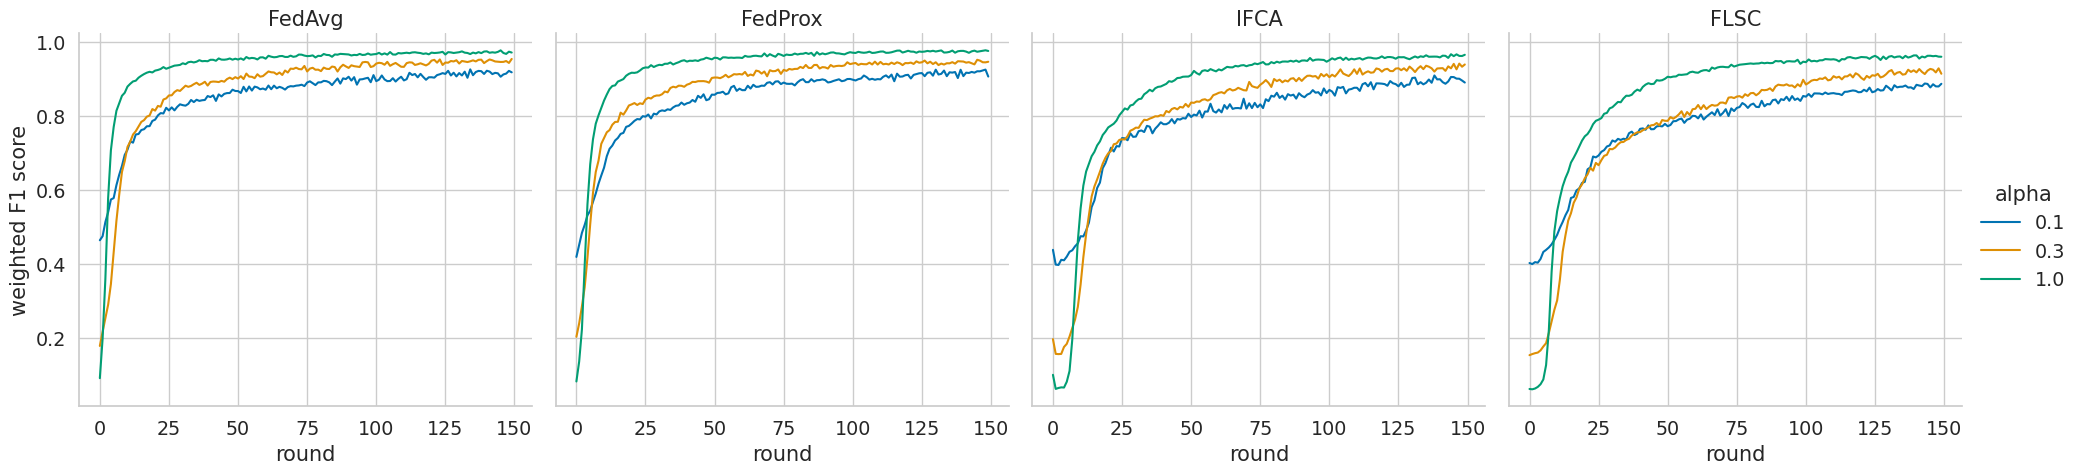

In [28]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

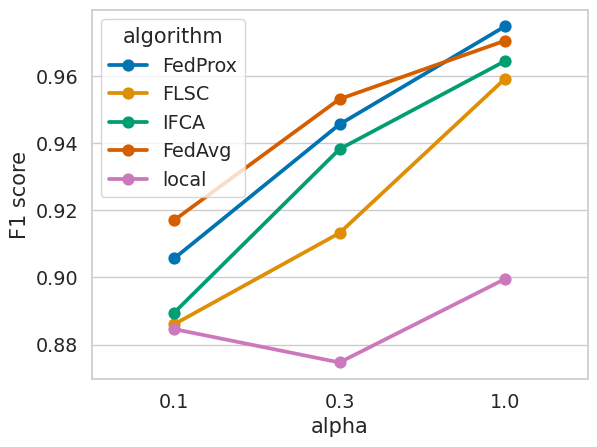

In [29]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [30]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [31]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

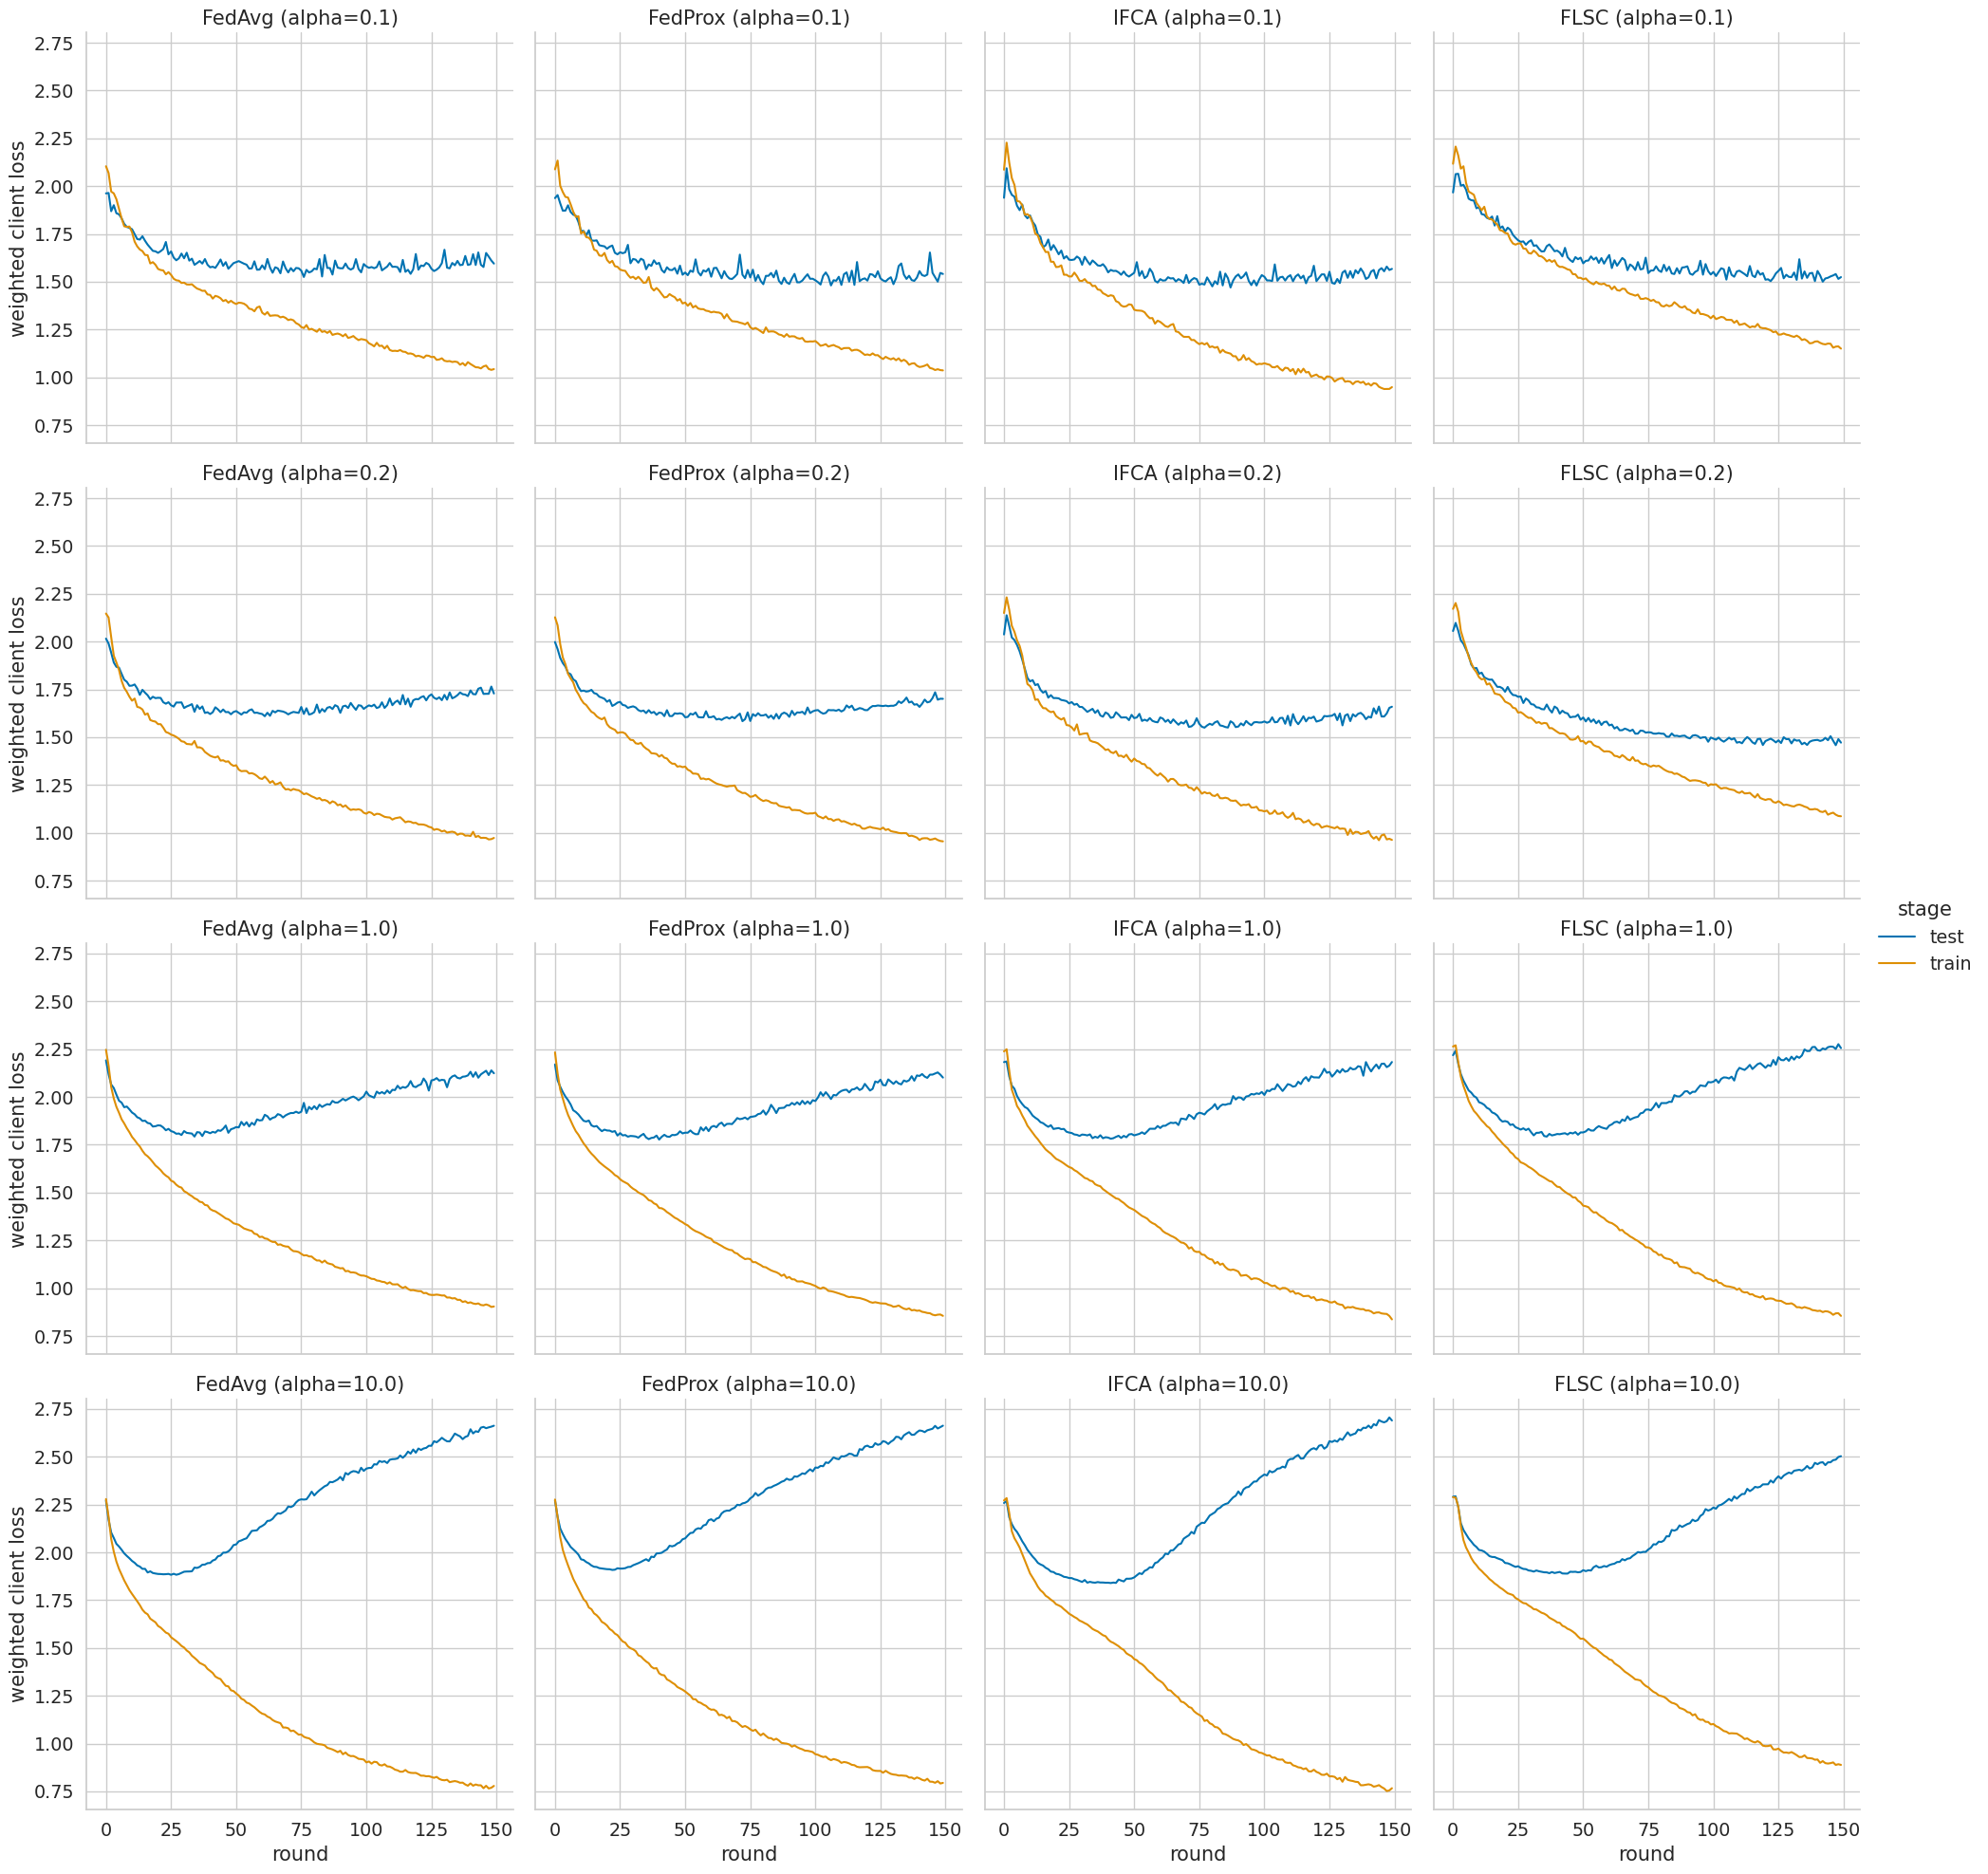

In [32]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


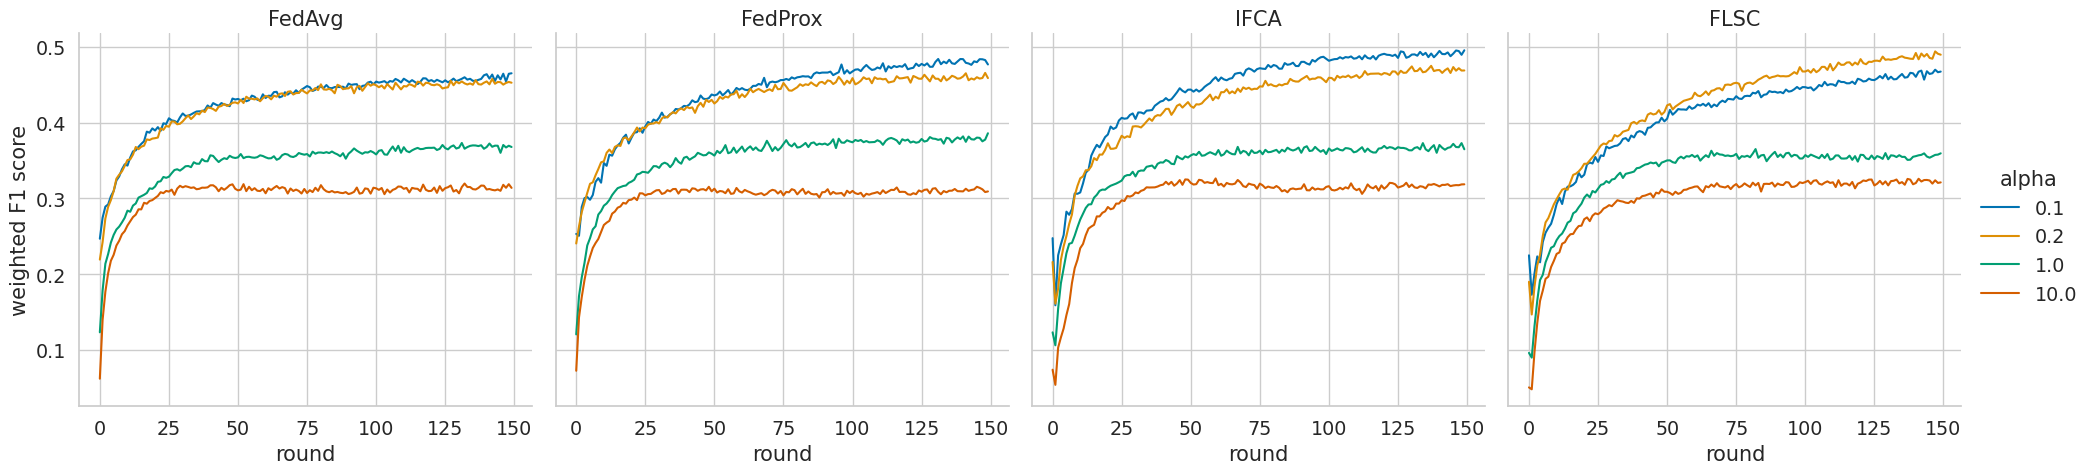

In [33]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

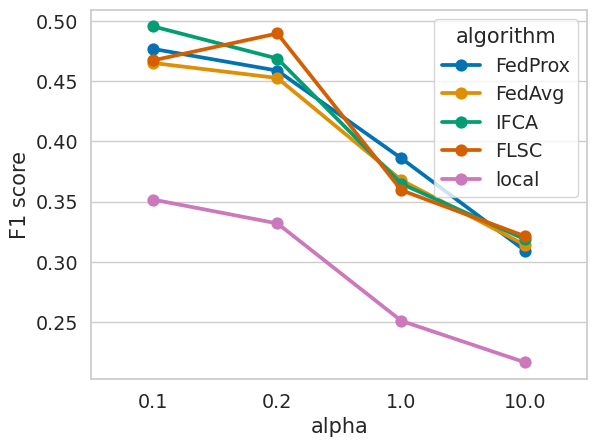

In [34]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [35]:
conn.close()

### MNIST

In [36]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

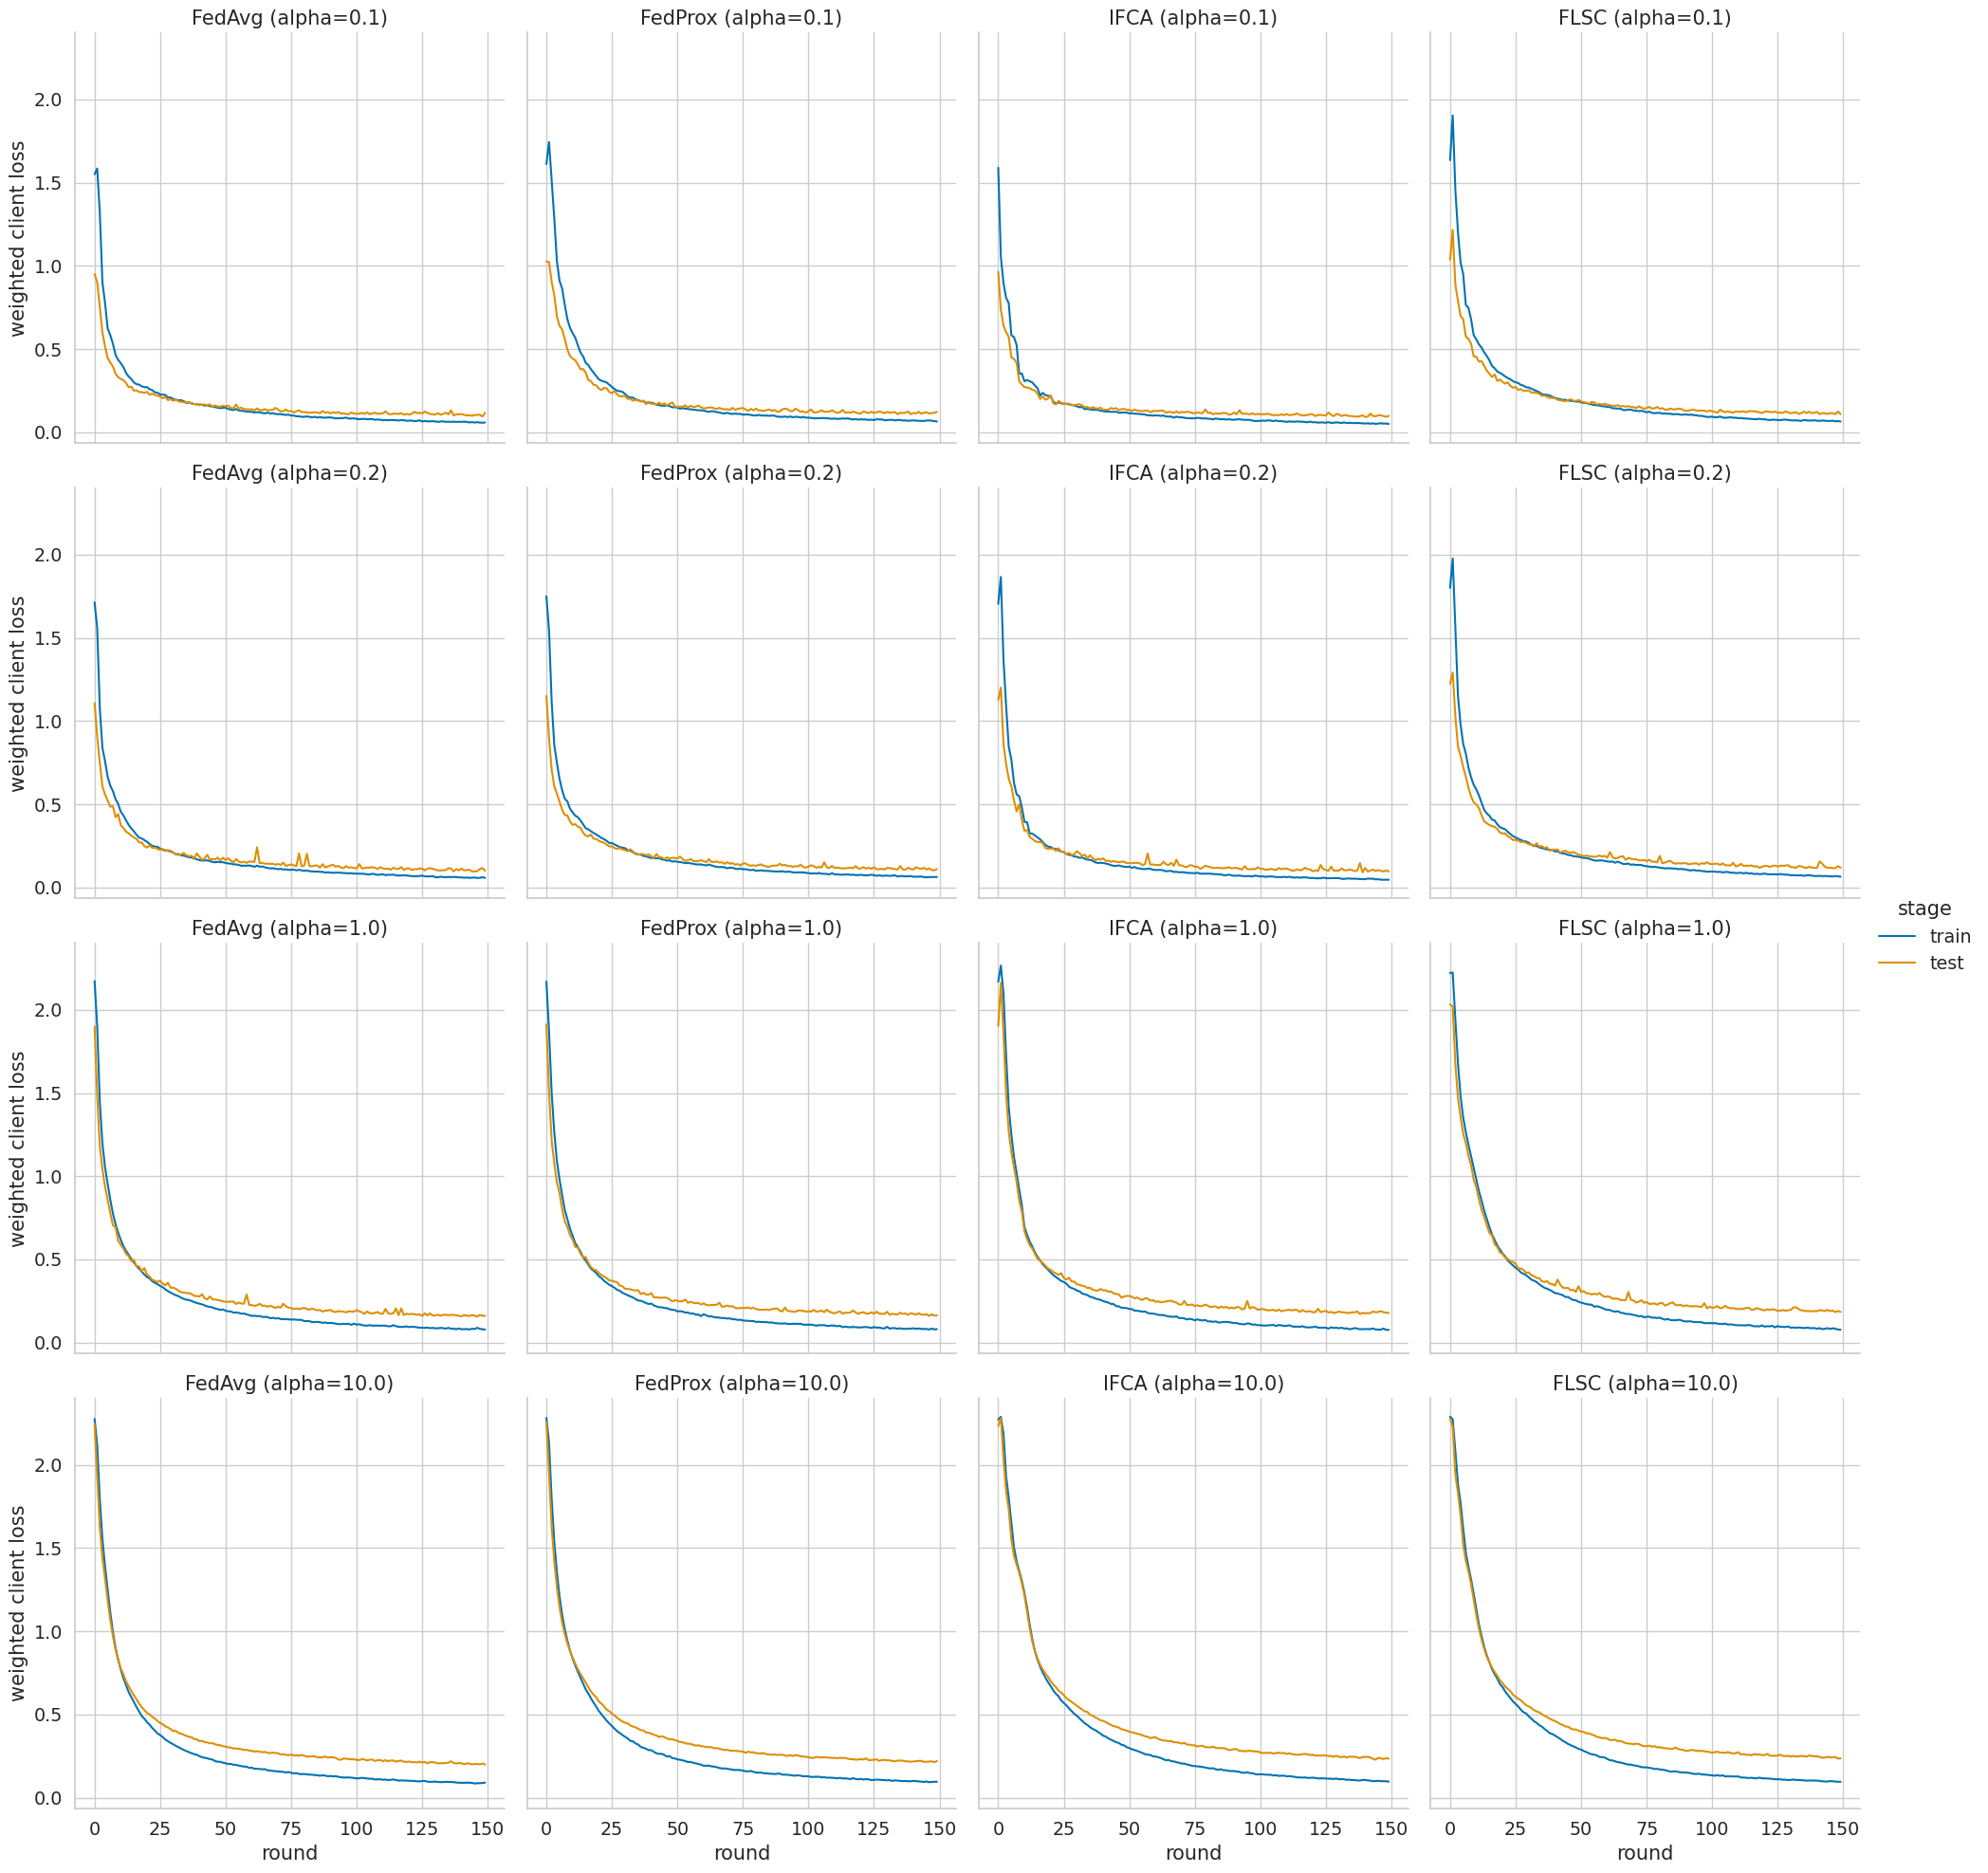

In [37]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/utils/model_evaluation/overall_performance.py:52: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  return sns.relplot(average_f1_data, x="round", y=y, col="algorithm", hue="alpha", kind="line",


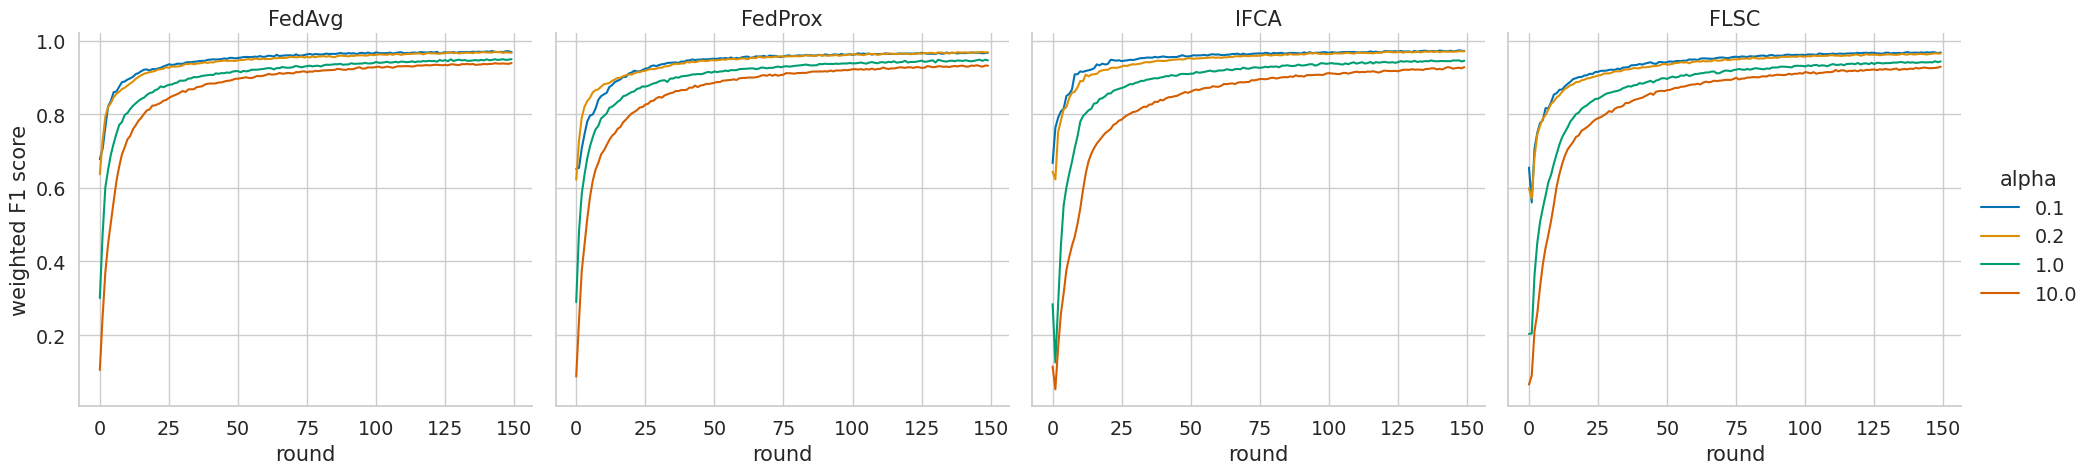

In [38]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

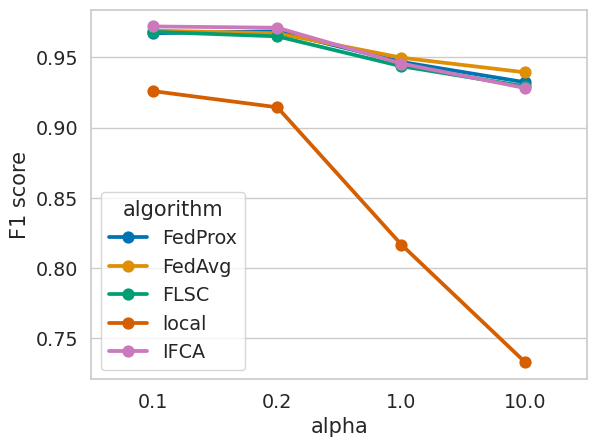

In [39]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [40]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [123]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [124]:
benefits = compute_client_benefit(conn, data)

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

In [125]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/quantity")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0      IFCA   0.321089  1.023105e-43 -0.083232  4.588297e-13  0.133859
1   FedProx   0.323068  3.004148e-44 -0.083279  4.034882e-13  0.134471
2      FLSC   0.321692  7.471740e-44 -0.083626  3.585479e-13  0.135032
3    FedAvg   0.322065  2.014817e-44 -0.082807  4.022350e-13  0.134485

In [126]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      IFCA   0.100389 -0.027138  0.004064  0.015741  0.151258  1.498589   
1   FedProx   0.097332 -0.026804  0.004429  0.018220  0.095934  1.494176   
2      FLSC   0.097069 -0.027137  0.004005  0.017441  0.111332  1.499357   
3    FedAvg   0.092609 -0.027060  0.004415  0.022438  0.042390  1.447456   

          p_LDI   adj_Rsq  
0  4.950138e-43  0.491862  
1  5.091696e-43  0.492975  
2  3.580867e-43  0.494026  
3  1.837123e-40  0.477643

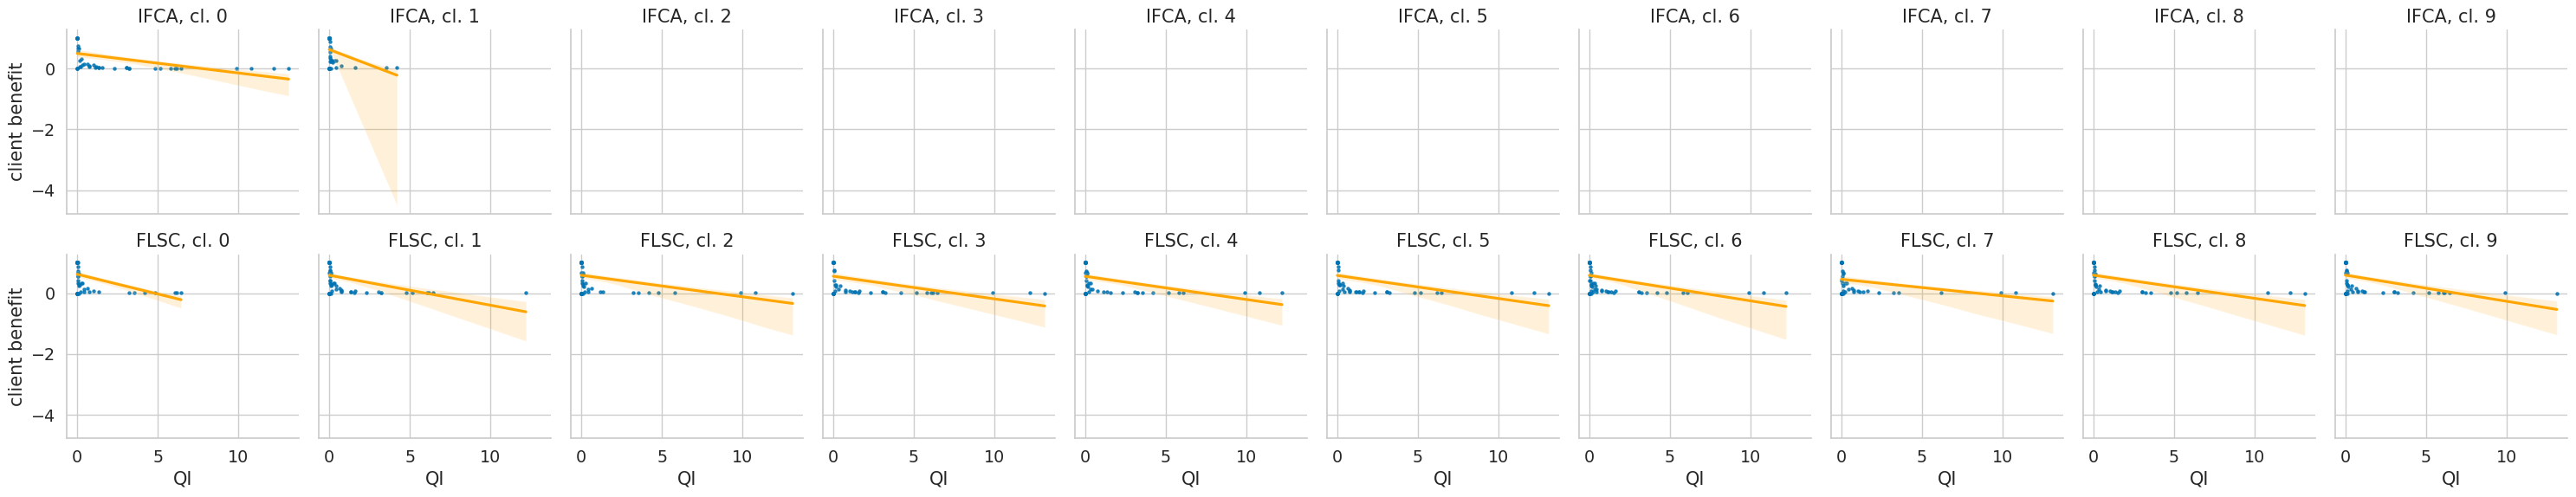

In [127]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance', imbalance_value=0.1).savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

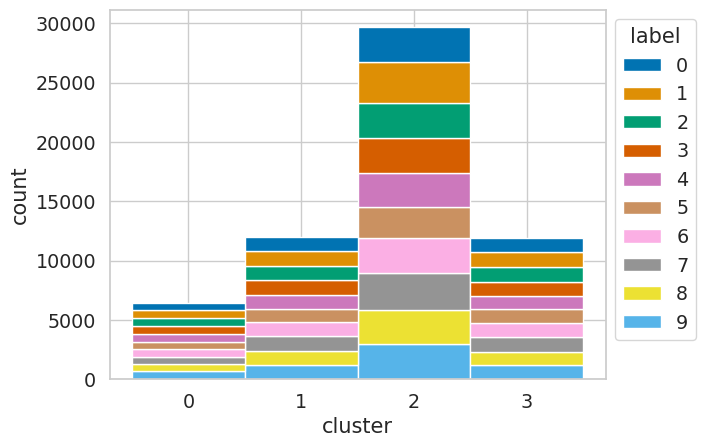

In [229]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters_histogram.png"))

In [203]:
benefits.explode('client_labels').client_labels.unique()

array([8, 5, 1, 9, 4, 2, 3, 7, 6, 0], dtype=object)

### MNIST

In [98]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [99]:
benefits = compute_client_benefit(conn, data)

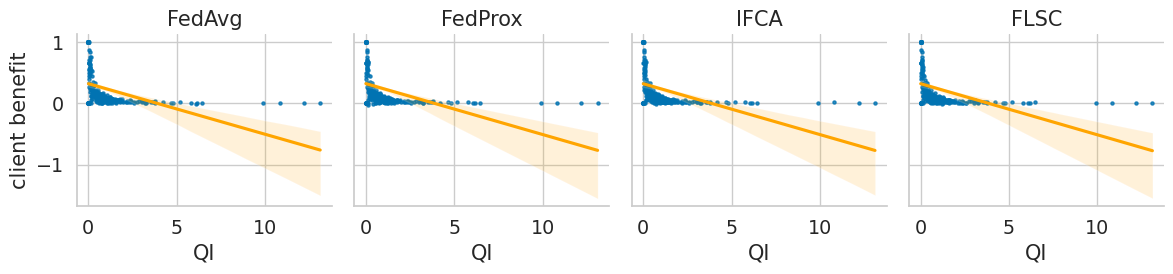

In [100]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

In [101]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/quantity")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0      IFCA   0.321089  1.023105e-43 -0.083232  4.588297e-13  0.133859
1   FedProx   0.323068  3.004148e-44 -0.083279  4.034882e-13  0.134471
2      FLSC   0.321692  7.471740e-44 -0.083626  3.585479e-13  0.135032
3    FedAvg   0.322065  2.014817e-44 -0.082807  4.022350e-13  0.134485

In [102]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      IFCA   0.100389 -0.027138  0.004064  0.015741  0.151258  1.498589   
1   FedProx   0.097332 -0.026804  0.004429  0.018220  0.095934  1.494176   
2      FLSC   0.097069 -0.027137  0.004005  0.017441  0.111332  1.499357   
3    FedAvg   0.092609 -0.027060  0.004415  0.022438  0.042390  1.447456   

          p_LDI   adj_Rsq  
0  4.950138e-43  0.491862  
1  5.091696e-43  0.492975  
2  3.580867e-43  0.494026  
3  1.837123e-40  0.477643

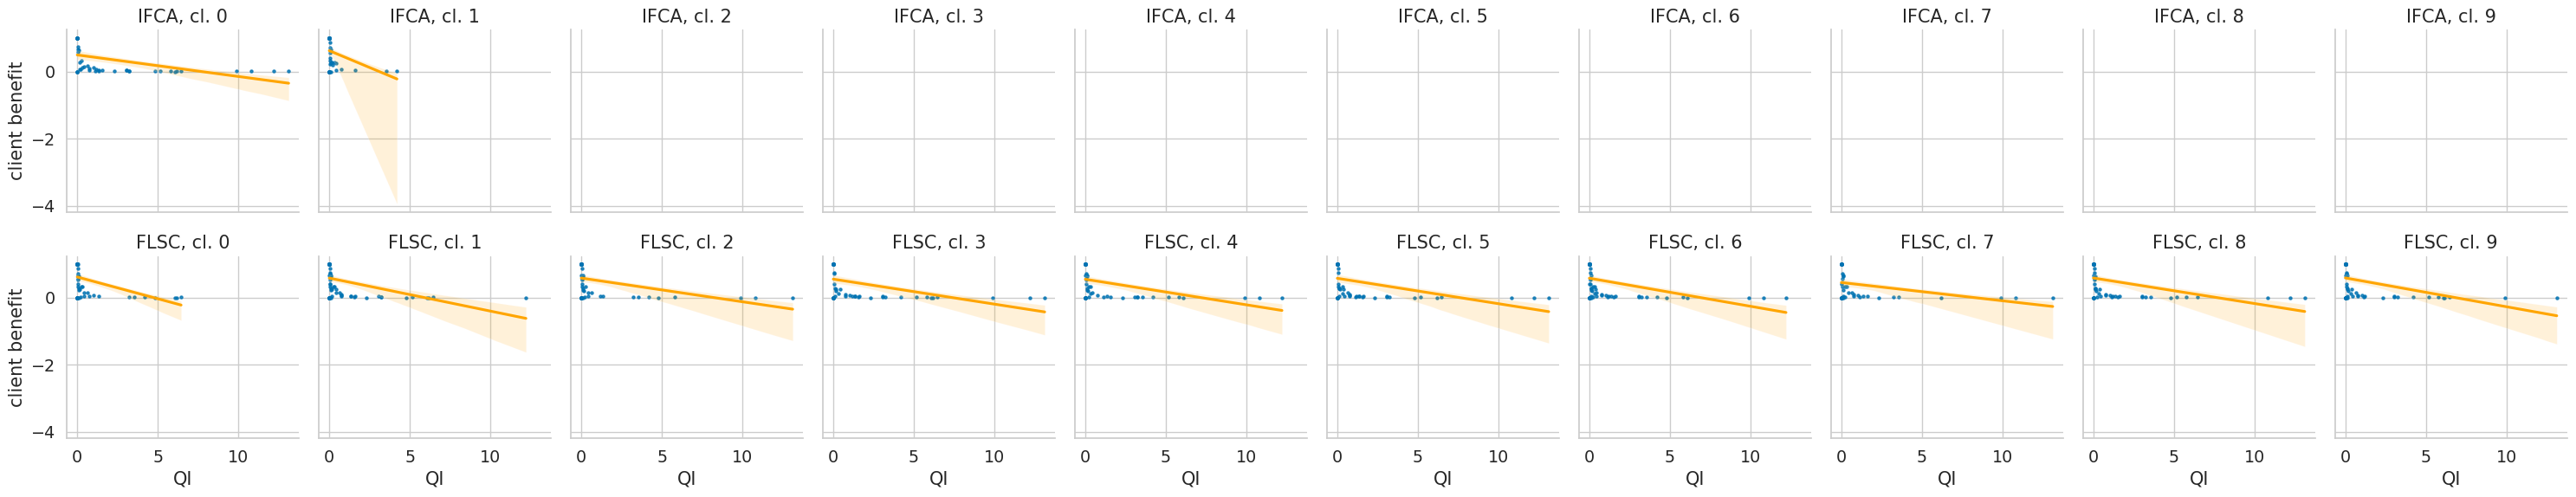

In [103]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

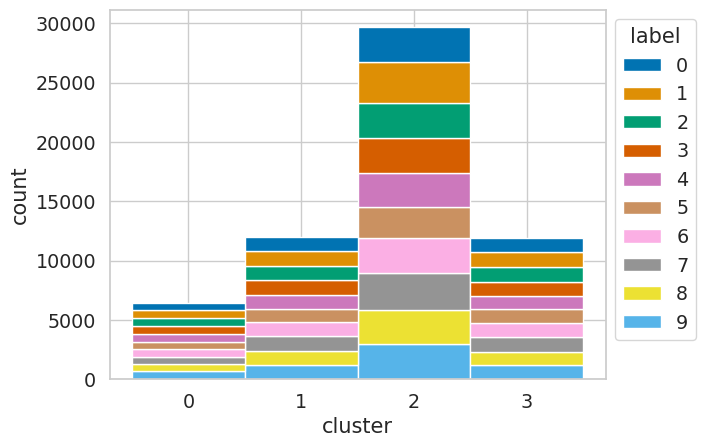

In [232]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters_histogram.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [234]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [235]:
benefits = compute_client_benefit(conn, data)

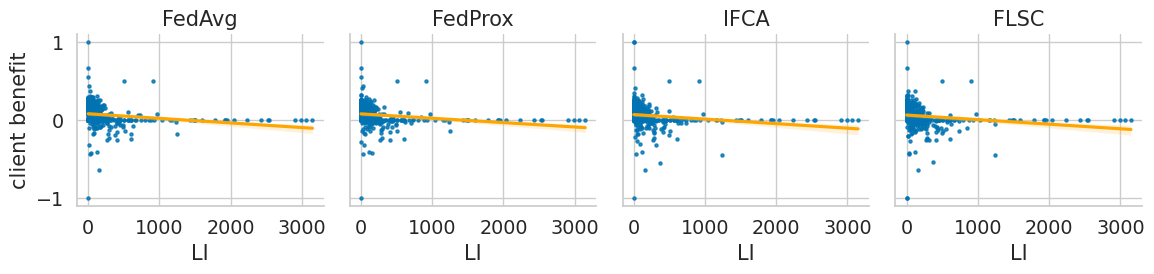

In [236]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

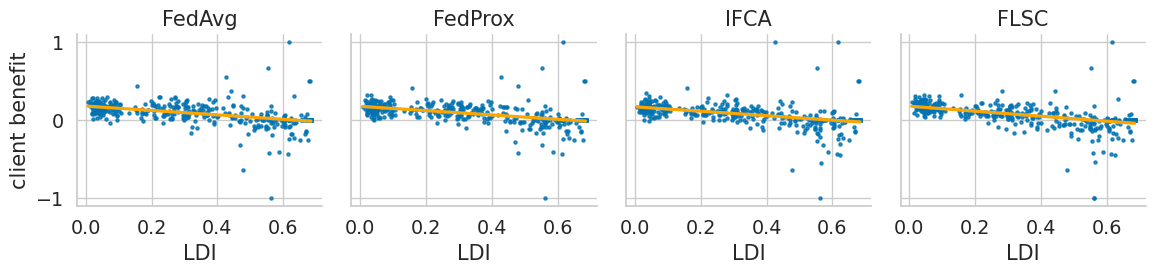

In [57]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10.png"))

In [58]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/label")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0   FedProx   0.072815  2.297285e-16 -0.002152  0.717853 -0.001818
1      FLSC   0.055670  2.084376e-08 -0.000661  0.922517 -0.002072
2    FedAvg   0.075265  4.175631e-16 -0.003567  0.566053 -0.001401
3      IFCA   0.065614  4.076110e-12 -0.004212  0.511584 -0.001188

In [59]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/label")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0   FedProx   0.218687 -0.035476  0.253777  0.000090  0.240038 -0.335129   
1      FLSC   0.271713 -0.081963  0.019739  0.000212  0.014925 -0.456684   
2    FedAvg   0.242582 -0.054574  0.095030  0.000135  0.095462 -0.368528   
3      IFCA   0.280170 -0.097579  0.004033  0.000241  0.004075 -0.437866   

          p_LDI   adj_Rsq  
0  6.793707e-10  0.262727  
1  1.512771e-13  0.278414  
2  1.148442e-10  0.252677  
3  1.978418e-13  0.248970

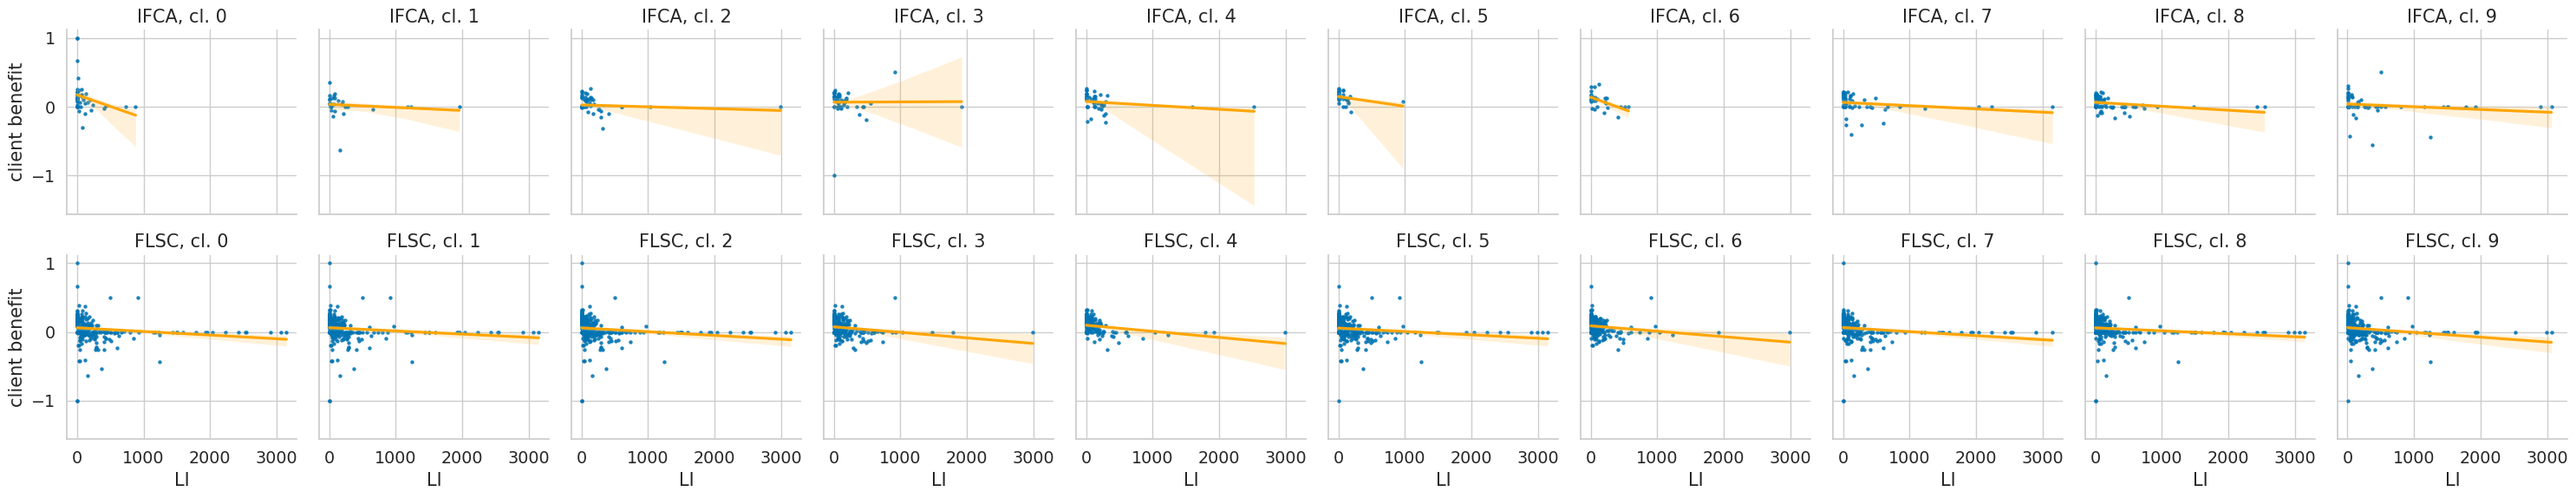

In [60]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

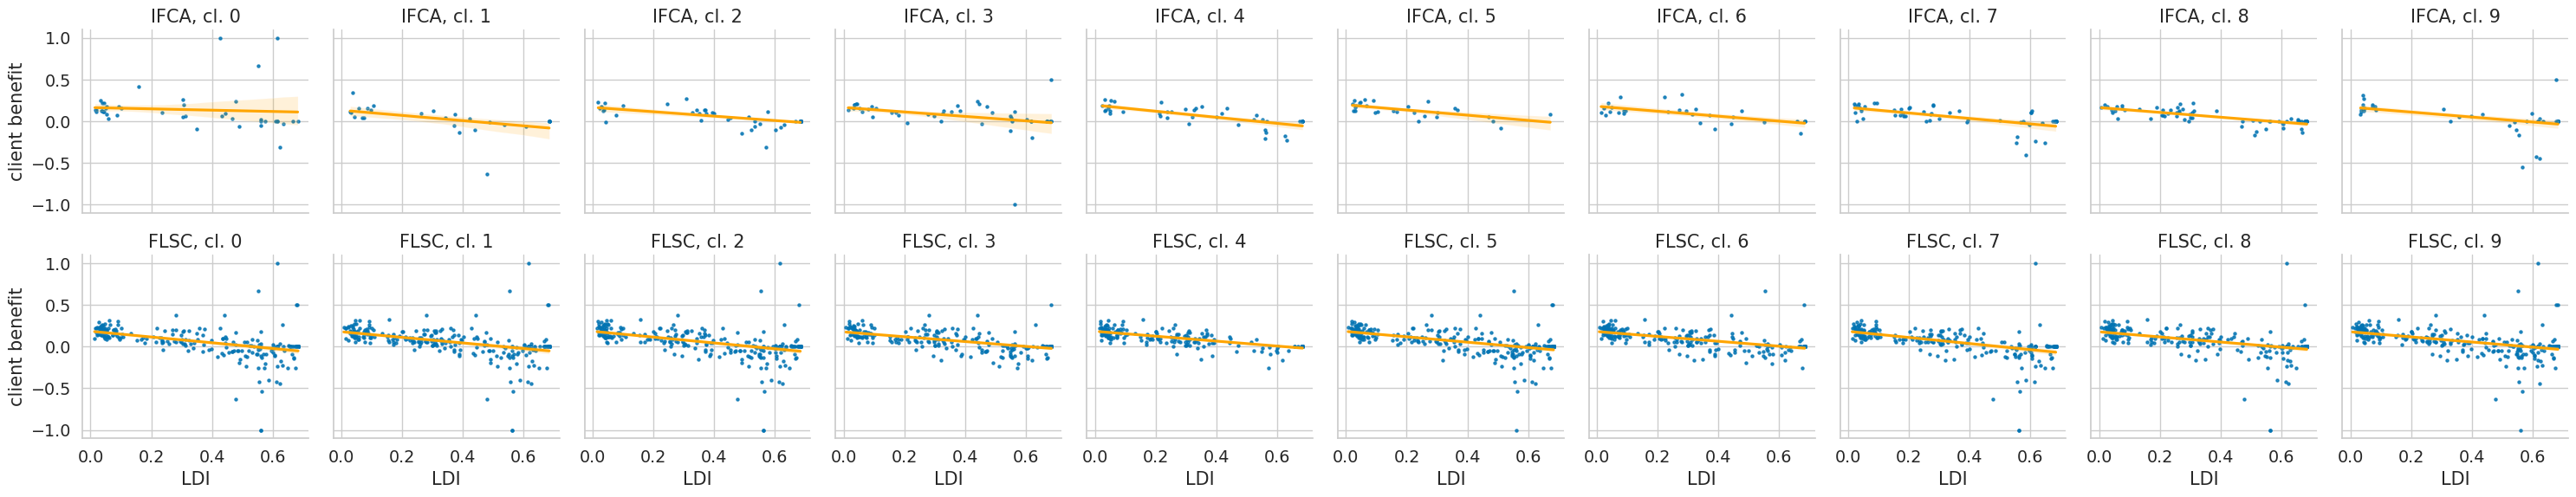

In [61]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

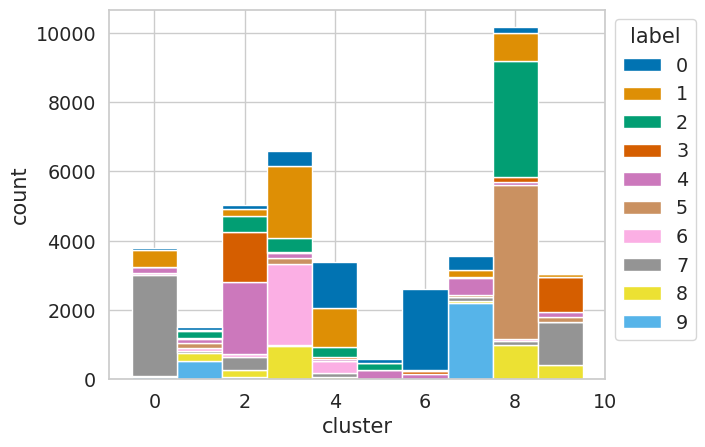

In [239]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters_histogram.png"))

### MNIST

In [240]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [241]:
benefits = compute_client_benefit(conn, data)

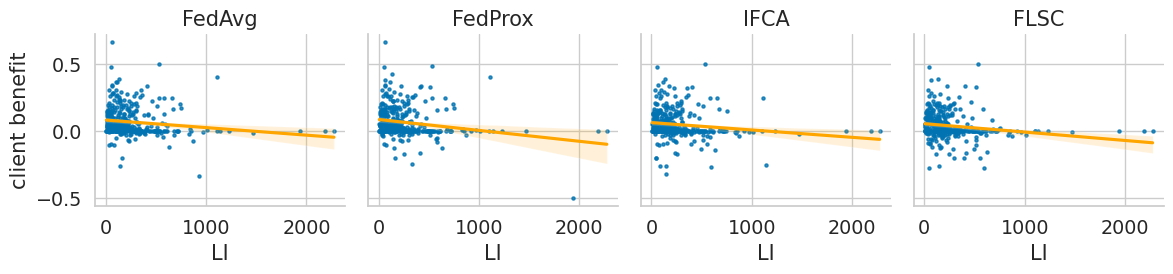

In [242]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist.png"))

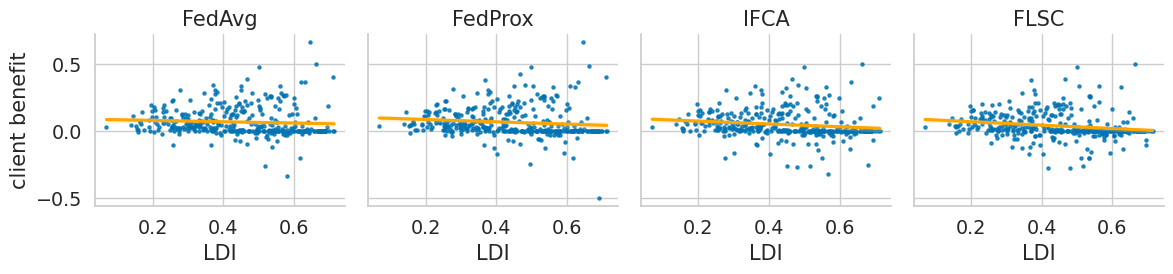

In [243]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [244]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/label")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0      FLSC   0.066181  7.830821e-10 -0.024776  0.006654  0.017652
1    FedAvg   0.098401  1.293929e-16 -0.028390  0.004040  0.020126
2   FedProx   0.104380  3.442465e-17 -0.036549  0.000384  0.031963
3      IFCA   0.072015  2.014813e-10 -0.020718  0.030360  0.010273

In [245]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/label")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      FLSC   0.150434 -0.048719  0.062630  0.000075  0.240776 -0.180535   
1    FedAvg   0.108151 -0.024922  0.384628 -0.000006  0.936479 -0.026702   
2   FedProx   0.104687 -0.015032  0.612514 -0.000049  0.498767 -0.020781   
3      IFCA   0.124739 -0.027826  0.313766  0.000029  0.668528 -0.120309   

      p_LDI   adj_Rsq  
0  0.007040  0.043788  
1  0.715120  0.016468  
2  0.783875  0.034659  
3  0.088457  0.022781

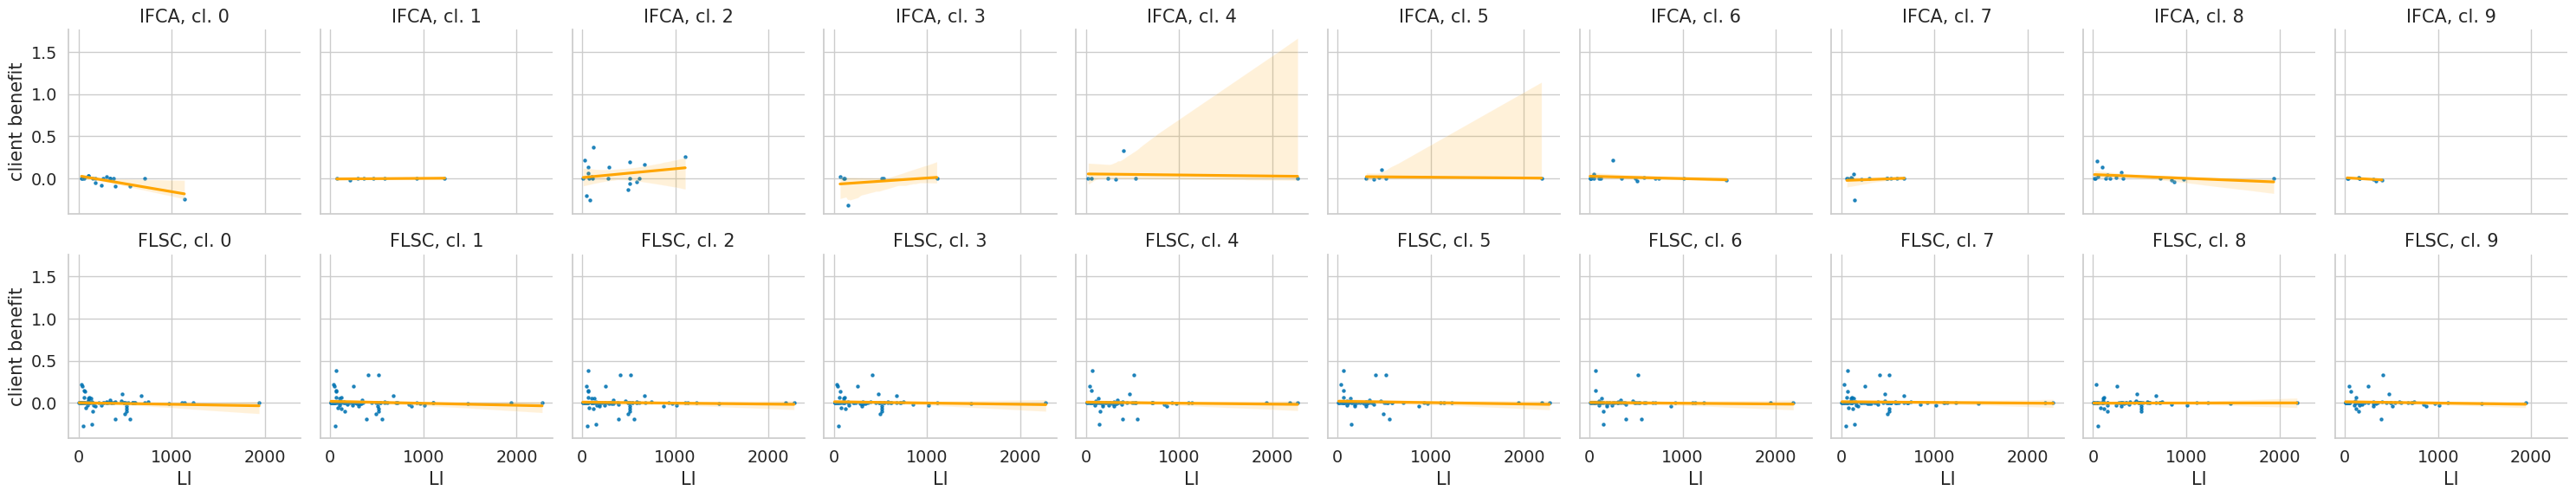

In [246]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

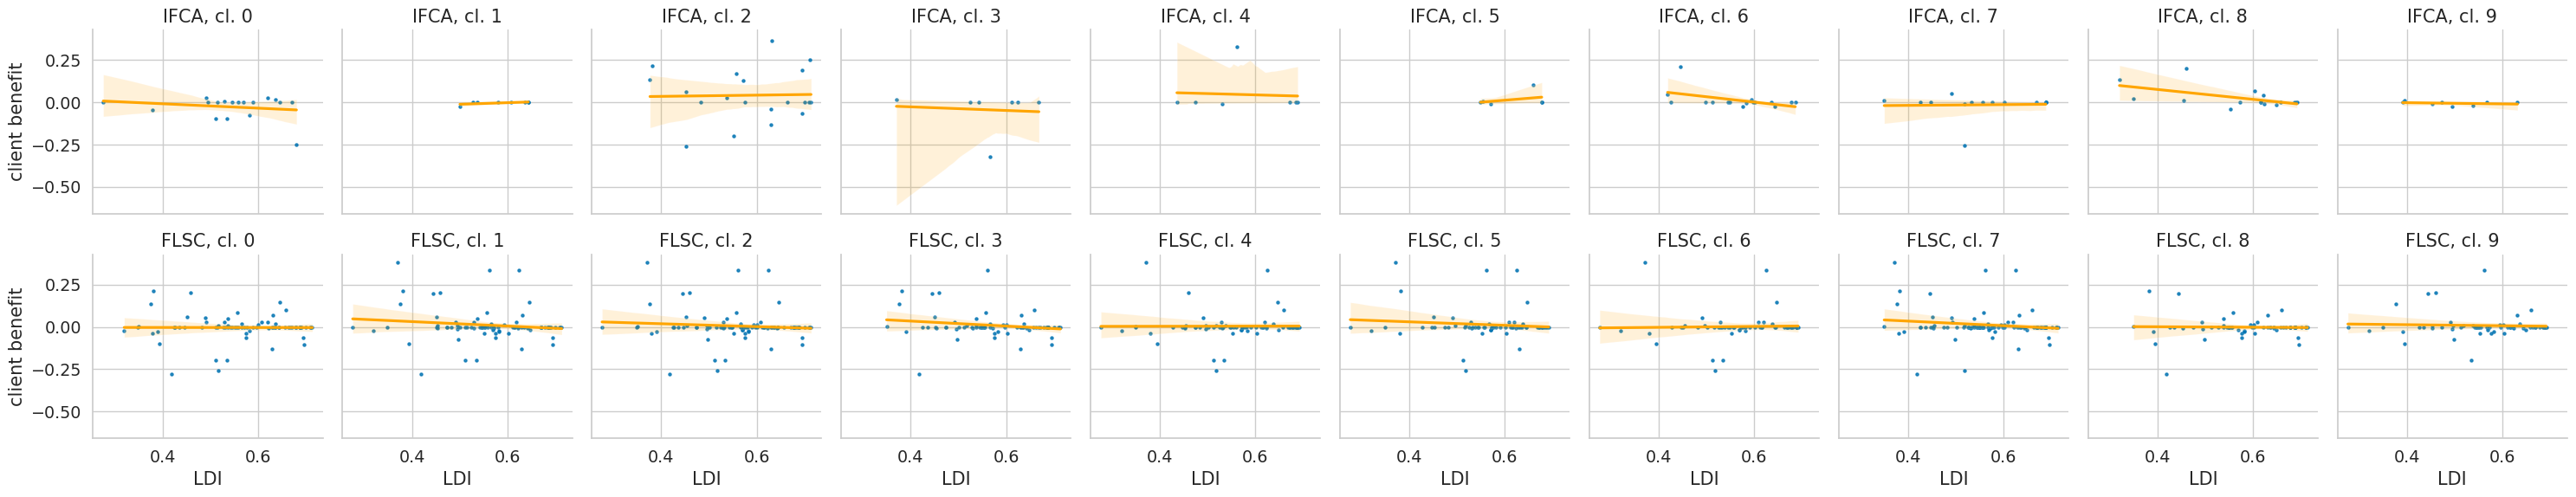

In [247]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

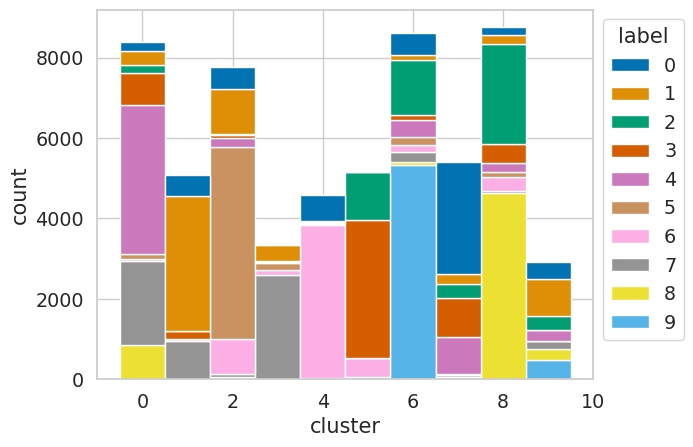

In [249]:
benefit_cluster_histogram(benefits, imbalance_value=0.1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters_histogram.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [250]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [251]:
benefits = compute_client_benefit(conn, data)

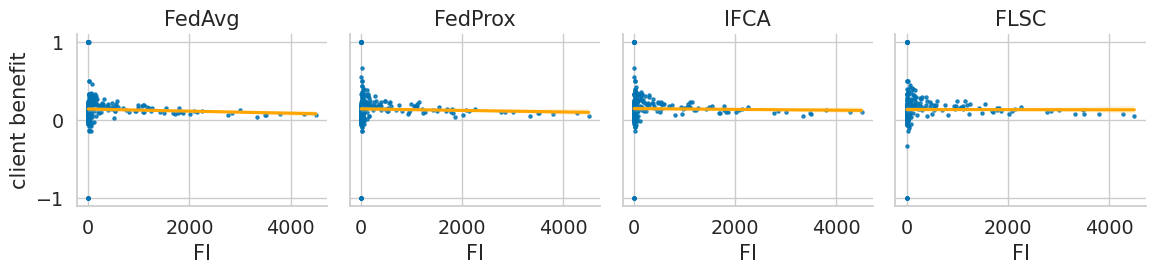

In [252]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

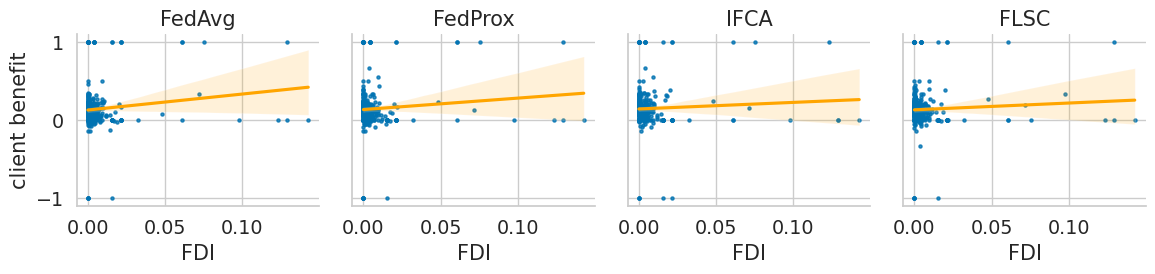

In [253]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [254]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/feature")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0   FedProx   0.153553  2.989572e-24 -0.009183  0.219520  0.001067
1      FLSC   0.144346  2.901616e-25 -0.006200  0.366001 -0.000379
2    FedAvg   0.152275  2.073894e-25 -0.010961  0.128755  0.002739
3      IFCA   0.158318  3.771644e-28 -0.009321  0.186353  0.001566

In [255]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on CIFAR-10/feature")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0   FedProx   0.155375 -0.030003  0.094244  0.000070  0.163047  1.239832   
1      FLSC   0.151300 -0.031363  0.056756  0.000081  0.078710  0.664183   
2    FedAvg   0.151069 -0.032133  0.062270  0.000073  0.127643  1.797665   
3      IFCA   0.168971 -0.041634  0.013866  0.000102  0.029985  0.550302   

      p_LDI   adj_Rsq  
0  0.136851  0.006426  
1  0.384849  0.004135  
2  0.025011  0.015218  
3  0.482979  0.008920

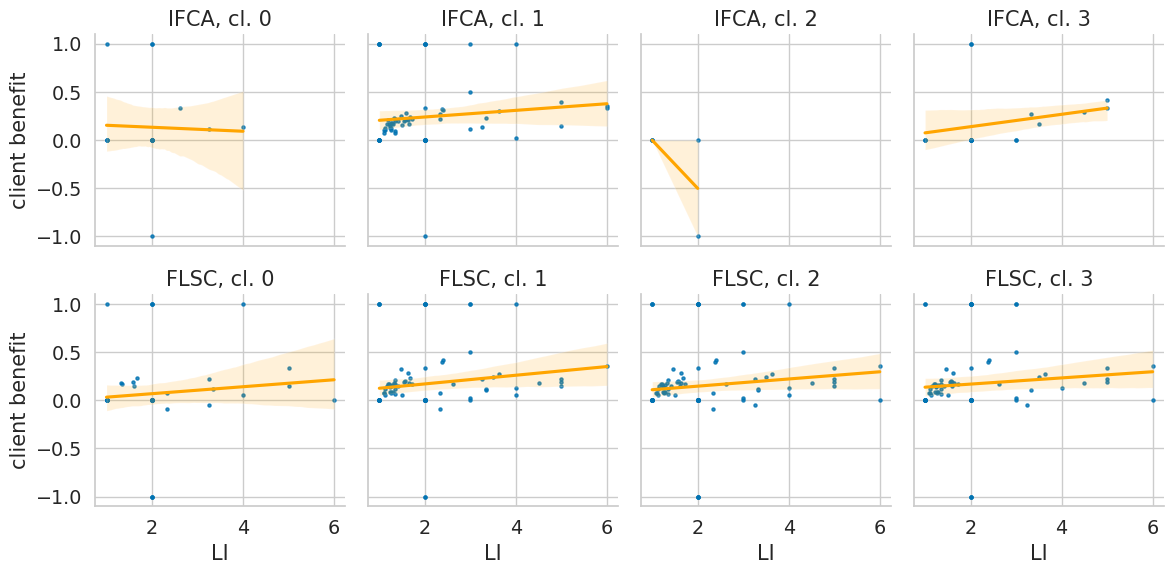

In [256]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

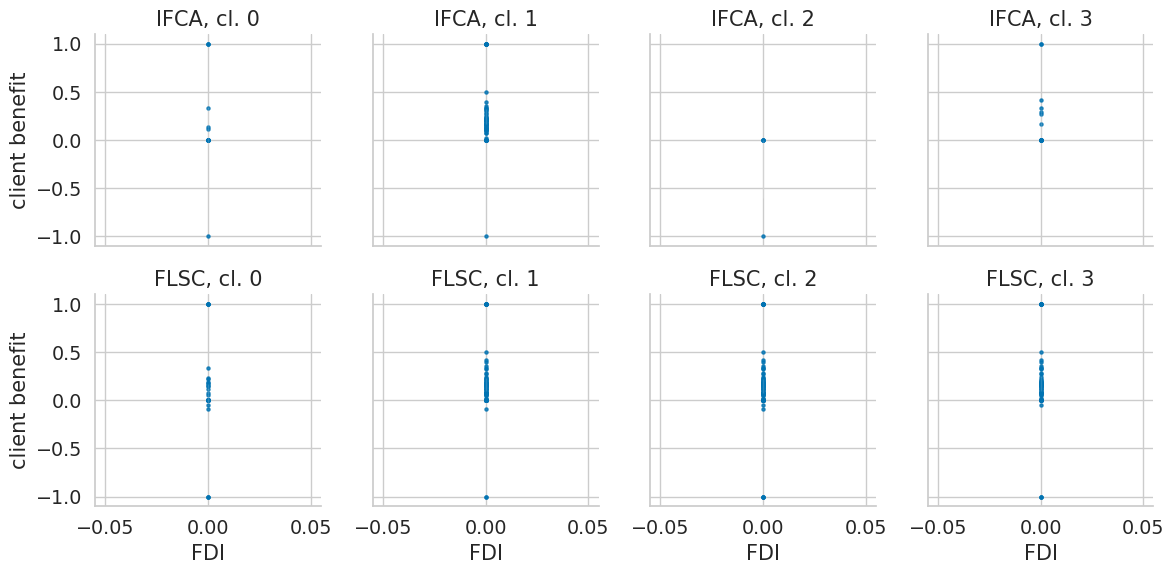

In [257]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

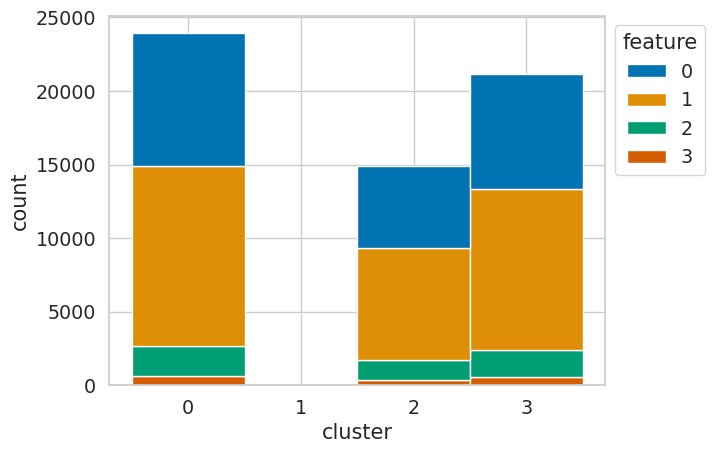

In [276]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="feature").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_features.png"))

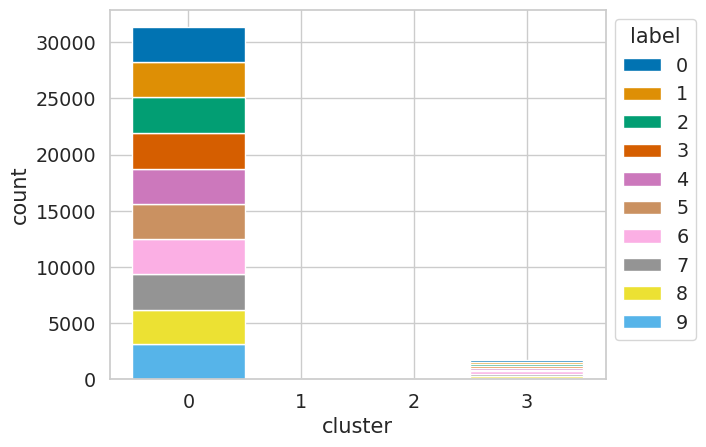

In [265]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="label").savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters_histogram_labels.png"))

### MNIST

In [277]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [278]:
benefits = compute_client_benefit(conn, data)

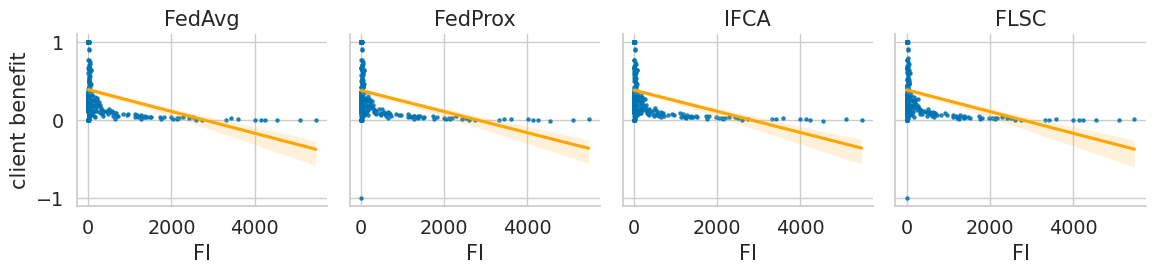

In [279]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist.png"))

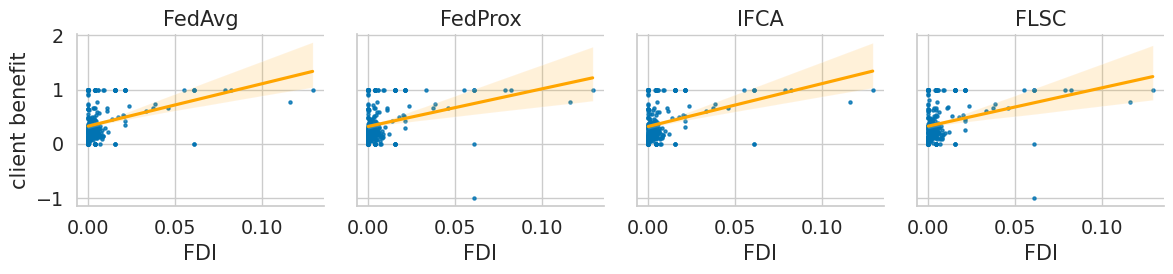

In [280]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [281]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/feature")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0    FedAvg   0.455519  1.088202e-97 -0.094340  5.248229e-24  0.190835
1      FLSC   0.453324  8.583874e-94 -0.095041  3.064101e-23  0.184891
2   FedProx   0.443902  4.902865e-91 -0.091893  6.825852e-22  0.174336
3      IFCA   0.448924  1.101762e-94 -0.093119  4.153184e-23  0.183863

In [282]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on MNIST/feature")

algorithm  intercept   beta_QI          p_QI   beta_LI          p_LI  \
0    FedAvg   0.480274 -0.212621  2.443640e-24  0.000321  8.034121e-12   
1      FLSC   0.485246 -0.220332  1.942234e-24  0.000337  4.260290e-12   
2   FedProx   0.472860 -0.210033  3.071257e-22  0.000318  7.352969e-11   
3      IFCA   0.474327 -0.214071  2.674001e-24  0.000329  4.139033e-12   

   beta_LDI     p_LDI   adj_Rsq  
0  5.105865  0.000005  0.301847  
1  4.290217  0.000187  0.287546  
2  4.269423  0.000226  0.268984  
3  5.203686  0.000004  0.298512

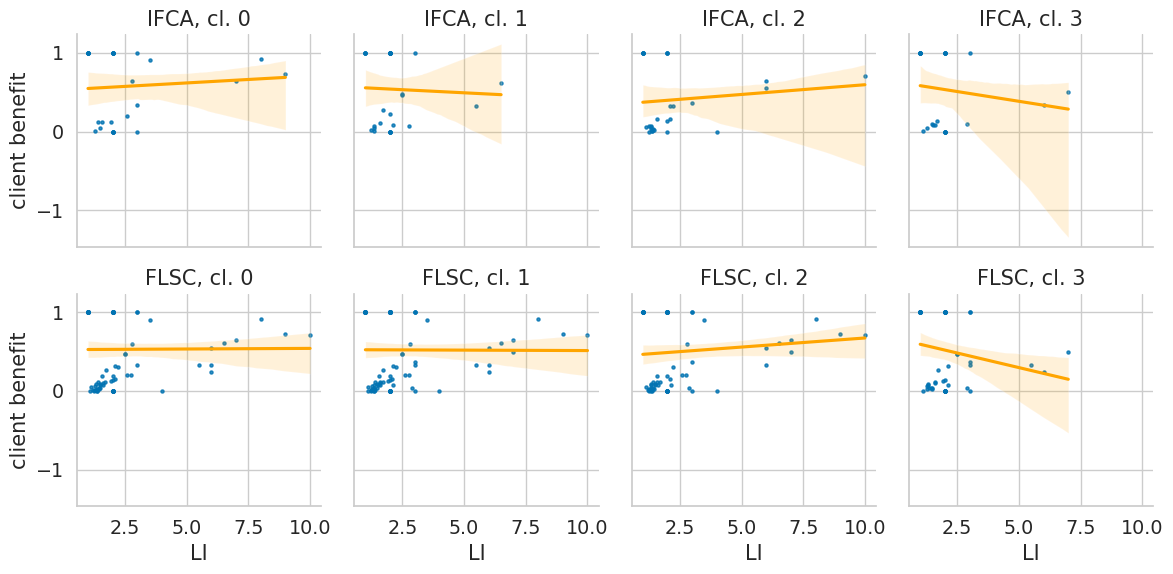

In [283]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

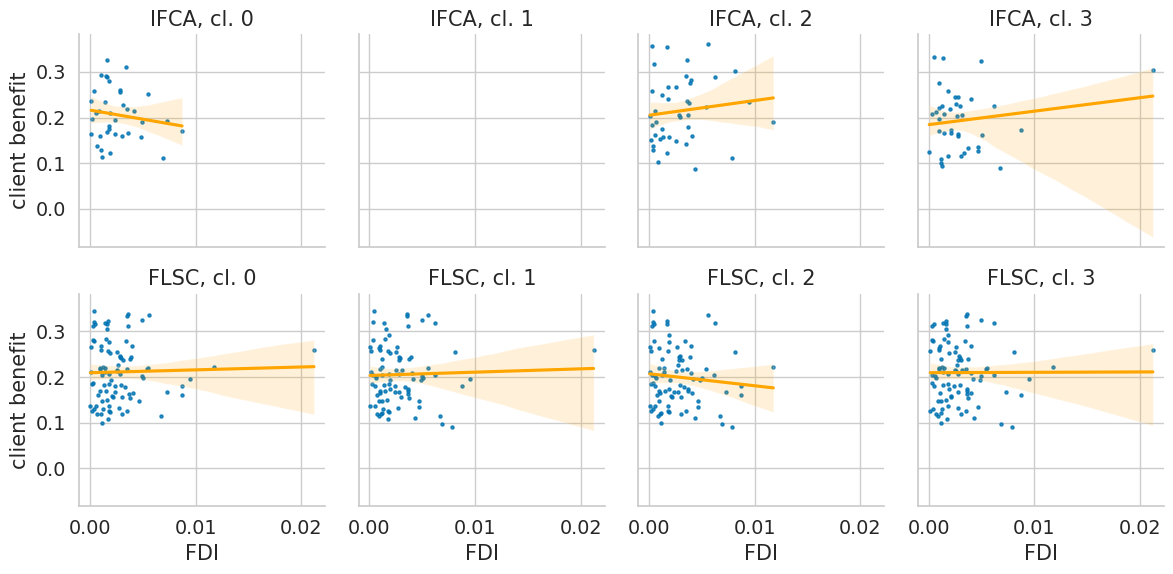

In [284]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance', imbalance_value=10).savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

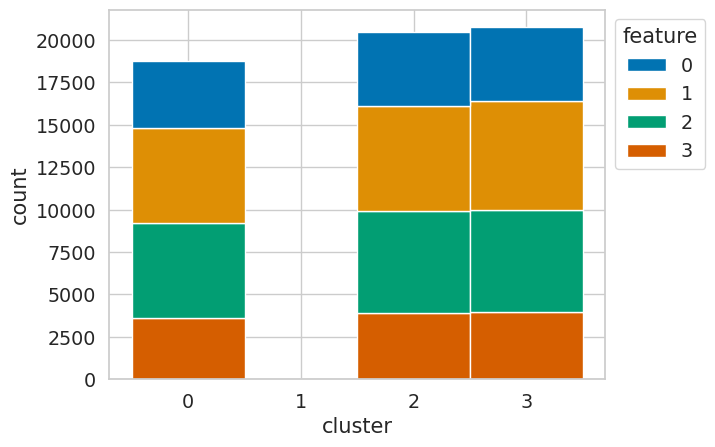

In [292]:
benefit_cluster_histogram(benefits, imbalance_value=10, algorithm="IFCA", by="feature").savefig(
    os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_features.png"))

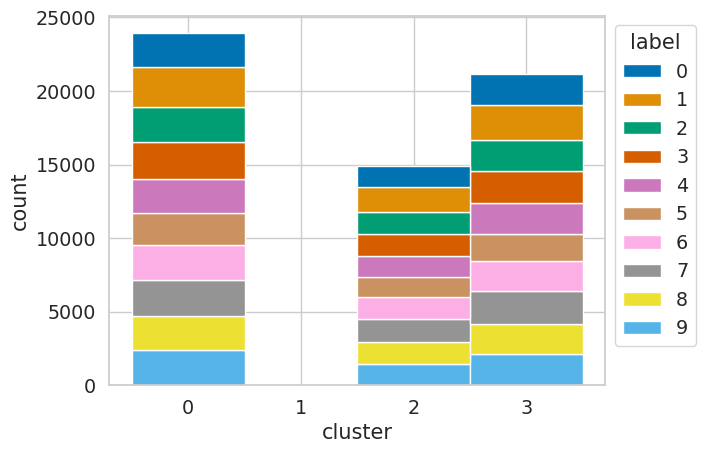

In [290]:
benefit_cluster_histogram(benefits, imbalance_value=1, algorithm="IFCA", by="label").savefig(
    os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters_histogram_labels.png"))

# Client Contribution

## CIFAR-10

In [ ]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [ ]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_cifar10.png"))

### Feature Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_cifar10.png"))

In [ ]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_cifar10.png"))

In [ ]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on CIFAR-10/feature")

In [ ]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on CIFAR-10/feature")

## MNIST

In [ ]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [ ]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_mnist.png"))

### Feature Imbalance

In [ ]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_mnist.png"))

In [ ]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_mnist.png"))

In [ ]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on MNIST/feature")

In [ ]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on MNIST/feature")